# Wine Price Study

#### Author: Steve Diamond [(GitHub)](https://github.com/StevenWDiamond)

## Problem Statement

We, the members of the Data Science committee of the Princeton Wine Club, often sit in our local wine shops and wonder what we should try next. The questions that we ask ourselves include the following:
- Is it worth the price?
- Was this a good year for this wine variety, in this country, in this region?
- How important are the wine reviews they display with the wines?
- What are we really paying for?
    * The country prestige?
    * The region?
    * The variety?
    
Each time we go through this process, we start by thanking god that we only like red wine, greatly narrowing the scope of our search.

To gain a deeper understanding of the relationship between wine prices and these various factors, we are studying a dataset with over 70,000 red wines which was scraped from WineEnthusiast Magazine's website. The data includes many of the factors we are looking to explore along with pricing for each wine. Our team will use a series of regression techniques in order to: 
- Better understand what factors are most important to determining price.
- Attempt to build a predictive model that can estimate the cost for a given bottle of wine

We will use Root Mean Square Error (RMSE) as our metric as we compare our models.


## Executive Summary

The pricing of wine is difficult for the buyer and we're never quite sure of the answers to the following questions: 
- Is it worth the price?
- Was this a good year for this wine variety, in this country, in this region?
- How important are the wine reviews they display with the wines?
- What are we really paying for?
    * The country prestige?
    * The region?
    * The variety?
    
To gain a deeper understanding of the relationship between wine prices and these various factors, we did the following:

1. Data Gathering
    - We acquired a dataset of WineEnthusiast Magazine reviews that included over 70,000 red wines. This list was scraped by a fellow data scientist and posted on Kaggle.com.
1. Data Processing
    - Our team imported the entire dataset into a Pandas DataFrame and did the following steps of cleaning:
        - Narrowed the list to only red wines.
        - Removed unneccesary columns.
        - Imputed missing data for a limited number of datapoints by visiting the WineEnthusiast site and gathering data that was available.
        - Dropped rows which didn't have pricing.
        - Combined wine varietal categories where appropriate.
1. Exploratory Data Analysis
    - We used a variety of methods to discover broad trends in our data, inlcuding examinations of:
        * Data distribution.
        * Data correlations.
        * Review content analysis.
    - After doing a KPrototypes cluster analysis, we were also able examine these clusters with against our original data.
1. Modeling and Evaluation
    - Prior to modeling our data, we used KPrototypes to do unsupervised learning, which was added to the DataFrame for modeling.
    - We then used regression modeling, attempting to predict wine price, using RMSE as our metric.

### Table Of Contents

#### In This Notebook
- [Loading Data](#Loading-Data)
    - [Library Imports](#Library-Imports)  
    - [Data Imports](#Data-Imports)
    - [Data Dictionary](#Data-Dictionary)
- [Data Cleaning](#Data-Cleaning) 
    - [Overview Analysis](#Overview-Analysis)
    - [Cleaning/EDA Needs by Column](#Cleaning/EDA-Needs-by-Column)
    - [Removing Non-Red Wines](#Part-A---Create-a-Dataframe-of-Red-Wines)
    - [Removing Columns](#Parts-B1-&-B8---Drop-Unneeded-Columns)
    - [Imputing Data](#Parts-B2---Country)
    - [Removing Additional Wines](#Part-B4---Designation)
    - [Drop Non-Prices Rows](#Part-B6---Price)
    - [Variety Combinations](#Part-B10---Variety)
    - [Winery Data](#Part-B11---Winery)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
    - [Feature Engineering](#Feature-Engineering)
        - [Province & Region Data](#Province,-Region-1-&-Region-2)
        - [Special Designation Column](#Designation-Information)
        - [Vintage Column from Title Column](#Vintage-Column-from-Title-Column)
    - [Data Correlations](#Data-Correlations)
    - [Data Distributions](#Data-Distributions)
    - [Data Interations](#Data-Interations)
        - [Price vs Review Score](#Relationship-of-Wine-Price-&-Review-Score)
        - [Cost-Per-Point Analysis](#Cost-Per-Point-Analysis)
    - [Review Word Frequency Analysis](#Review-Word-Frequency-Analysis)
    - [Post-EDA Data Preparation](#Post-EDA-Data-Preparation)
- [Return To EDA](#Return-To-EDA)

#### [KPrototypes Notebook](kprototyes.ipynb)


#### [Modeling-Conclusions Notebook](modeling.ipynb)
- Modeling
    - Model Preparation
    - Models
        - Baseline Model
        - Linear Regression - Original Data
        - Linear Regression - KModes Data
        - Ridge Regression
        - LASSO Regression
        - Decision Tree Regression
        - Random Forest Regresssion
        - Extra Trees Regression
        - Feed Forward Neural Network
- Model Selection
- Model Evaluation
    - Residual Analysis
    - Coefficient Analysis/Interpretation
- Conclusion
- References


## Loading Data

### Library Imports

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

In [2]:
# allow for full printing as needed
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [3]:
# Establish a function to reset index of a DataFrame if necessary
def reset_index(df):
# reset act data set index so Alabama row is now 0 in index
    df.reset_index(inplace = True)

# Drop 'index' row from the act data set - (created by last step)
    df.drop(columns = ['index'],inplace=True)

### Data Imports

In [4]:
# Import Data
df = pd.read_csv('../data/winemag-data-130k-v2.csv')
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


### Data Dictionary 

|**Feature Name**|**Description**|
|:---|:---|
|county|Wine's country of origin|
|description|Wine review copy|
|designation|Part of wine name that separates this particular wine (i.e. Reserve|
|points|Wine Enthusiast review score|
|price|Cost of wine (on the Wine Enthusiast site, this includes a link to buy)|
|Province|Wine's province or state of origin (i.e. Provence, Califorinia)|
|region_1|Wine's specific region (i.e. Calistoga)|
|region_2|Wine's general region (i.e. Napa)|
|taster_name|Name of reviewer|
|taster_twitter_handle|Twitter information for reviewer|
|title|Full name of wine|
|variety|Grapes used to make the wine, sometimes called varietals|
|Unnamed: 0|Remnant column from saving without removing index|
|winery|Winemaker name|


[Table of Contents](#Table-Of-Contents)
## Data Cleaning

### Overview Analysis

In [5]:
# Checking column data types
df.dtypes

Unnamed: 0                 int64
country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object

In [6]:
# Checking for empty values
df.isnull().sum()

Unnamed: 0                   0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [7]:
df.describe()

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


### Cleaning/EDA Needs by Column

#### A. Broad Observations & Action Needed

- This data includes red wines, white wines and other types of wines like rose, dessert wines and sparkling wines.
    - We need to remove the other wines from the list.


#### B. Columns Observations & Actions Needed

1. Unnamed 0 
    * **Observations:** 
        - This is a remnant of an old index.
    * **Action:** 
        - Drop column.
1. country
    * **Observations:** 
        - Need to examine 63 empty cells.
        - For modeling, column needs to be numeric.
    * **Action:** 
        - Find out if 63 empty cells for province are in the same rows. 
        - Determine if this data is easily available.
        - Create dummy columns.
1. description
    * **Observations:** 
        - Since our target variable is price, these descriptions/reviews are not likely to be a contributng factor (as they are already captured in review score (points).
        - An analysis of the words could be useful for understanding some of the common factors of higher priced wines.
    * **Action:** 
        - Do NLP study as part of EDA to look at the words.
        - Drop column for modeling.
1. designation
    * **Observations:** 
        - For some of the wines, this row repeats some of the information from the title column.
        - A quick scan shows that we can identify some of the wines we want to remove in this column (rose, port, sparkling wines and dessert wines).
        - It is also a place where we can find words that connote specialty wines like "Reserve" wines.
    * **Action:** 
        - Examine values as part of EDA.
        - Use as second screen for wines we don't want in list.
        - Consider making a dummy column for some words like "Reserve".
1. points
    * **Observations:** 
        - All scores are here and they are all between 80 and 100.
    * **Action:** 
        - No cleaning needed but should check distribution in EDA.
1. price
    * **Observations:** 
        - This is our target variable so rows with missing prices can't be in dataset.
    * **Action:** 
        - Drop empty price rows.
1. province, region_1 and region_2
    * **Observations:** 
        - From province => region_2 => region_1, this information gets more and more specific (i.e. California => Napa => Yountville). 
    * **Action:** 
        - Examine the columns and, with necessary outside research, determine what to keep and what to drop.
1. taster_name & taster_twitter_handle
    * **Observations:** 
        - Information on a specific Wine Enthusiast reviewer is not relevant to price.
    * **Action:** 
        - Drop columns.
1. title 
    * **Observations:** 
        - This column is the only place where we find vintage (year) information.
        - All of the other info in the title is already captured elsewhere
    * **Action:** 
        - Create column from vintage information in title.
        - Drop column.
1. variety
    * **Observations:** 
        - Since this study is limited to red wines, this is the best column to use to remove the white wines and specialty wines that we need to drop from our data.
    * **Action:** 
        - We need to do outside research to determine which varieties are red wines.
        - We will also look for other ways to group wines and narrow our list.
1. winery
    * **Observations:** 
        - Little can be said from an initial look at the winery data.
    * **Action:** 
         - Need to examine values as part of EDA.

[Table of Contents](#Table-Of-Contents)
### Part A - Create a Dataframe of Red Wines

In [9]:
# By consulting www.winemag.com and www.wine-searcher.com, we narrowed down a list of all varieties
# in the original data to create this string of red wines 
red_wines= "Abouriou,Agiorgitiko,Aglianico,Albarossa,Alfrocheiro,Alicante,Alicante Bouschet,Aragonês,Aragonez,Argaman,Austrian Red Blend,Babić,Babosa Negro,Baco Noir,Baga,Baga-Touriga Nacional,Barbera,Barbera-Nebbiolo,Black Muscat,Blatina,Blauburger,Blauburgunder,Blauer Portugieser,Blaufränkisch,Bobal,Bobal-Cabernet Sauvignon,Boğazkere,Bonarda,Bordeaux-style Red Blend,Bovale,Braucol,Cabernet,Cabernet Blend,Cabernet Franc,Cabernet Franc-Cabernet Sauvignon,Cabernet Franc-Carmenère,Cabernet Franc-Lemberger,Cabernet Franc-Malbec,Cabernet Franc-Merlot,Cabernet Merlot,Cabernet Moravia,Cabernet Pfeffer,Cabernet Sauvignon,Cabernet Sauvignon Grenache,Cabernet Sauvignon-Barbera,Cabernet Sauvignon-Cabernet Franc,Cabernet Sauvignon-Carmenère,Cabernet Sauvignon-Malbec,Cabernet Sauvignon-Merlot,Cabernet Sauvignon-Merlot-Shiraz,Cabernet Sauvignon-Sangiovese,Cabernet Sauvignon-Shiraz,Cabernet Sauvignon-Syrah,Cabernet Sauvignon-Tempranillo,Cabernet-Malbec,Cabernet-Shiraz,Cabernet-Syrah,Canaiolo,Cannonau,Carignan,Carignan-Grenache,Carignan-Syrah,Carignane,Carineña,Cariñena-Garnacha,Carmenère,Carmenère-Cabernet Sauvignon,Carmenère-Syrah,Casavecchia,Castelão,Chambourcin,Chancellor,Charbono,Chelois,Ciliegiolo,Cinsault,Colorino,Corvina,Corvina Rondinella Molinara,Counoise,Dornfelder,Duras,Durif,Espadeiro,Fer Servadou,Frappato,G-S-M,Gaglioppo,Gamay,Gamay Noir,Garnacha,Garnacha Blend,Garnacha Tintorera,Garnacha-Cabernet,Garnacha-Cariñena,Garnacha-Monastrell,Garnacha-Syrah,Garnacha-Tempranillo,Graciano,Grenache,Grenache Blend,Grenache Gris,Grenache Noir,Grenache-Carignan,Grenache-Mourvèdre,Grenache-Shiraz,Grenache-Syrah,Grignolino,Grolleau,Kalecik Karasi,Kekfrankos,Lagrein,Lemberger,Listán Negro,Magliocco,Malbec,Malbec Blend,Malbec-Bonarda,Malbec-Cabernet,Malbec-Cabernet Franc,Malbec-Cabernet Sauvignon,Malbec-Carménère,Malbec-Merlot,Malbec-Petit Verdot,Malbec-Syrah,Malbec-Tannat,Malbec-Tempranillo,Mandilaria,Mansois,Marquette,Marselan,Mataro,Maturana,Mavrokalavryta,Mavrotragano,Mavroudi,Mavrud,Mazuelo,Melnik,Mencía,Meritage,Merlot,Merlot-Argaman,Merlot-Cabernet,Merlot-Cabernet Franc,Merlot-Cabernet Sauvignon,Merlot-Grenache,Merlot-Malbec,Merlot-Petite Verdot,Merlot-Shiraz,Merlot-Syrah,Merlot-Tannat,Mission,Molinara,Monastrell,Monastrell-Petit Verdot,Monastrell-Syrah,Mondeuse,Monica,Montepulciano,Mourvèdre,Mourvèdre-Syrah,Nebbiolo,Negrette,Negroamaro,Nerello Cappuccio,Nerello Mascalese,Nero d'Avola,Nero di Troia,Nielluciu,Norton,Ojaleshi,Okuzgozu,País,Pallagrello,Pallagrello Nero,Parraleta,Perricone,Petit Verdot,Petite Sirah,Petite Verdot,Piedirosso,Pignoletto,Pignolo,Pinot Noir,Pinot Noir-Gamay,Pinot Noir-Syrah,Pinotage,Pinotage-Merlot,Portuguese Red,Portuguiser,Poulsard,Prieto Picudo,Primitivo,Provence red blend,Prugnolo Gentile,Pugnitello,Raboso,Ramisco,Rara Neagra,Rebo,Red Blend,Refosco,Rhône-style Red Blend,Ruché,Sagrantino,Sangiovese,Sangiovese Cabernet,Sangiovese Grosso,Sangiovese-Cabernet Sauvignon,Sangiovese-Syrah,Saperavi,Saperavi-Merlot,Schiava,Sciaccerellu,Shiraz,Shiraz-Cabernet,Shiraz-Cabernet Sauvignon,Shiraz-Grenache,Shiraz-Malbec,Shiraz-Mourvèdre,Shiraz-Roussanne,Shiraz-Tempranillo,Shiraz-Viognier,Spätburgunder,St. Laurent,St. Vincent,Susumaniello,Symphony,Syrah,Syrah-Bonarda,Syrah-Cabernet,Syrah-Cabernet Franc,Syrah-Cabernet Sauvignon,Syrah-Carignan,Syrah-Grenache,Syrah-Grenache-Viognier,Syrah-Malbec,Syrah-Merlot,Syrah-Mourvèdre,Syrah-Petit Verdot,Syrah-Petite Sirah,Syrah-Tempranillo,Syrah-Viognier,Tannat,Tannat-Cabernet,Tannat-Cabernet Franc,Tannat-Merlot,Tannat-Syrah,Tempranillo,Tempranillo Blend,Tempranillo-Cabernet Sauvignon,Tempranillo-Garnacha,Tempranillo-Malbec,Tempranillo-Merlot,Tempranillo-Shiraz,Tempranillo-Syrah,Tempranillo-Tannat,Teran,Teroldego,Teroldego Rotaliano,Tinta de Toro,Tinta del Pais,Tinta del Toro,Tinta Fina,Tinta Miúda,Tinta Negra Mole,Tinta Roriz,Tintilia,Tinto del Pais,Tinto Fino,Tinto Velasco,Touriga,Touriga Franca,Touriga Nacional,Touriga Nacional Blend,Touriga Nacional-Cabernet Sauvignon,Trollinger,Uva di Troia,Uvalino,Valdiguié,Vidadillo,Vranac,Vranec,Xinomavro,Zinfandel,Zweigelt,None"

In [10]:
# We convert the string into a list
red_list = red_wines.split(',')

# and then create a dummy column with 1 for red and 0 for non-red
is_red = []
for i, variety in enumerate(df['variety']):
    for red in red_list:
        if variety == red:
            is_red.append(i)

df['is_red'] = [1 if num in is_red else 0 for num in range(0,df.shape[0])]

In [11]:
# this list is trimmed to just he red wines
df = df.loc[df['is_red'] == 1].copy()

# and we drop the dummy column
df.drop(columns='is_red', inplace=True)

In [12]:
# remove duplicate rows, if any
df = df.loc[~df.duplicated()]
df.shape

(77446, 14)

### Parts B1 & B8 - Drop Unneeded Columns

In [13]:
# drop columns per items 1 & 8 above
df.drop(columns=['Unnamed: 0','taster_name','taster_twitter_handle'], inplace=True)

### Parts B2 - Country

Filling empty cells with outside research.

**See EDA for Examination & Dummy Creation**

In [14]:
reset_index(df)

In [15]:
# Fill all empty cells in country and province with 'unknown'
df['country'].fillna('unknown', inplace=True)
df['province'].fillna('unknown', inplace=True)

unknown_loc = [cell for cell, country in enumerate(df['country']) if country == 'unknown']

In [16]:
# On the Wine Enthusiast site, we were able to gather the missing information for these 28 wines and compile 
# this dictionary with index number, country, designation, province and region information for each.
country_nans = {1900:['France','Table Wine', 'Rhône Valley', "Rhône Valley", "NaN"],
                2544:["Georgia","Red Naturally Semi-Sweet","Lechkhumi","Racha-Lechkhumi","NaN"],
                6709:["Bulgaria","Vintage","Struma River Valley","Thracian Lowlands","NaN"],
                9635:["Uruguay","Valle de los Manantiales Vineyard","Maldonado","Garzon","NaN"],
                15825:["Kosovo","Vintage","Dukagjin Valley","Rahovec Valley","NaN"],
                21615:["Bulgaria","Hrumki Melnik 55 Mourvèdre Marselan","Struma River Valley","Thracian Lowlands","NaN"],
                23330:["Canada","Wismer-Parke Vineyard","Ontario","Twenty Mile Bench","Niagara"],
                26785:["Kosovo","Amphora","Dukagjin Valley","Rahovec Valley","NaN"],
                27093:["Chile","Reserva Estate Bottled","San Rafael","Maule Valley","NaN"],
                27613:["Chile","Catalina","Maipo Alto","Puente Alto","NaN"],
                29391:["Bulgaria","Getika Made With Organic Grapes","Struma River Valley","Thracian Lowlands","NaN"],
                29392:["Bulgaria","Getika Made With Organic Grapes","Struma River Valley","Thracian Lowlands","NaN"],
                29393:["Bulgaria","Hrumki Syrah Melnik 55 Mourvèdre Marselan","Struma River Valley","Thracian Lowlands","NaN"],
                29456:["Israel","Vintage","Jerusalem","Judean Hills","NaN"],
                34244:["Kosovo","Premium","Dukagjin Valley","Rahovec Valley","NaN"],
                47169:["Bulgaria","Nobile","Struma River Valley","Thracian Lowlands","NaN"],
                47476:["Bulgaria","Made With Organic Grapes","Struma River Valley","Thracian Lowlands","NaN"],
                51000:["Greece","Theopetra Estate","Thessalia","Meteora","NaN"],
                58349:["Israel","Peak","Jerusalem","Judean Hills","NaN"],
                59839:["Uruguay","Reserve","Central Region","Durazno","NaN"],
                62903:["Israel","M Series","Jerusalem","Judean Hills","NaN"],
                67560:["Uruguay","Reserve","Central Region","Durazno","NaN"],
                71575:["Israel","M Series","Jerusalem","Judean Hills","NaN"],
                73953:["Switzerland","Les Romaines","Vaud","La Côte","NaN"],
                77112:["Uruguay","Reserve","Central Region","Durazno","NaN"],
                77113:["Uruguay","Reserve","Central Region","Durazno","NaN"],
                77229:["Turkey","Shah","Marmara","NaN","NaN"],
                77410:["Israel","Vintage","Jerusalem","Judean Hills","NaN"]}

In [17]:
# adding in the informantion for each wine.
for key, value_list in country_nans.items():
    df['country'][key] = value_list[0]
    df['designation'][key] = value_list[1]
    df['province'][key] = value_list[2]
    df['region_1'][key] = value_list[3]
    df['region_2'][key] = value_list[4]


/Users/SWDiamond/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/SWDiamond/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/SWDiamond/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

[Table of Contents](#Table-Of-Contents)
### Part B4 - Designation

Need to remove the following types of wines that may have been missed earlier:
- Tawny in designation
- Rosé or Rose in designation
- Sparkling in designation

**See EDA for New Features & Drop Column**

In [18]:
reset_index(df)

In [19]:
# finding and dropping all of the rose, port and sparkling wines that were missed in the earlier process

df['designation'] = df['designation'].astype(str)

bad_row_list = []

for i, des in enumerate(df['designation']):
    if "Rosé" in des:
        bad_row_list.append(i)
    elif 'Rose' in des:
        bad_row_list.append(i)
    elif "Tawny" in des:
        bad_row_list.append(i)
    elif "Sparkling" in des:
        bad_row_list.append(i)
    
df.drop(bad_row_list, axis=0,inplace=True)



[Table of Contents](#Table-Of-Contents)
### Part B6 - Price

Dropping all rows without a price.

In [20]:
# drop rows where price is empty
df = df.dropna(axis=0, subset=['price'])

### Part B7 - Province, Region_1 & Region_2

**See EDA for Examination, New Features & Dummy Creation**


### Part B9 - Title

**See EDA for Examination, New Features & Dummy Creation**


### Part B10 - Variety

Combining varieties based on outside research, including:
- Combining varieties that have multiple names (grapes often have multiple names and different names in different countries).
- Combining blends where the lead blend is the same variety.

**See EDA for Examination, New Features & Dummy Creation**


In [301]:
# Dictionary of existing varieties and what they should be changed to
red_delta_dict= {'Babosa Negro':'Alfrocheiro',
                 'Tinta Francisca':'Alfrocheiro',
                 'Cannonau':'Grenache',
                 'Alicante':'Grenache',
                 'Alicante Bouschet':'Grenache',
                 'Aragonês':'Grenache',
                 'Aragonez':'Grenache',
                 'Grenache Noir':'Grenache',
                 'Carignane':'Grenache',
                 'Tinta del Pais':'Tempranillo',
                 'Tinta del Toro':'Tempranillo',
                 'Tinta Fina':'Tempranillo',
                 'Tinta Roriz':'Tempranillo',
                 'Tintilia':'Tempranillo',
                 'Tinto del Pais':'Tempranillo',
                 'Tinto Fino':'Tempranillo',
                 'Perricone':'Barbera',
                 'Pignatello':'Barbera',
                 'Blauburgunder':'Pinot Noir',
                 'Portuguiser':'Blauer Portugieser',
                 'Lemberger':'Blaufränkisch',
                 'Kekfrankos':'Blaufränkisch',
                 'Tintilia':'Grenache',
                 'Bovale':'Grenache',
                 'Cabernet Moravia':'Cabernet Franc',
                 'Braucol':'Cabernet Franc',
                 'Mansois':'Cabernet Franc',
                 'Fer Servadou':'Cabernet Franc',
                 'Cabernet':'Cabernet Franc',
                 'Cabernet Franc-Cabernet Sauvignon':'Cabernet Franc',
                 'Cabernet Franc-Carmenère':'Cabernet Franc',
                 'Cabernet Franc-Lemberger':'Cabernet Franc',
                 'Cabernet Franc-Malbec':'Cabernet Franc',
                 'Cabernet Franc-Merlot':'Cabernet Franc',
                 'Cabernet Merlot':'Cabernet',
                 'Cabernet Sauvignon Grenache':'Cabernet Sauvignon',
                 'Tinta de Toro':'Tempranillo',
                 'Cabernet Sauvignon-Barbera':'Cabernet Sauvignon',
                 'Cabernet Sauvignon-Cabernet Franc':'Cabernet Sauvignon',
                 'Cabernet Sauvignon-Carmenère':'Cabernet Sauvignon',
                 'Cabernet Sauvignon-Malbec':'Cabernet Sauvignon',
                 'Cabernet Sauvignon-Merlot':'Cabernet Sauvignon',
                 'Cabernet Sauvignon-Merlot-Shiraz':'Cabernet Sauvignon',
                 'Cabernet Sauvignon-Sangiovese':'Cabernet Sauvignon',
                 'Cabernet Sauvignon-Shiraz':'Cabernet Sauvignon',
                 'Cabernet Sauvignon-Syrah':'Cabernet Sauvignon',
                 'Cabernet Sauvignon-Tempranillo':'Cabernet Sauvignon',
                 'Cabernet-Malbec':'Cabernet',
                 'Cabernet-Shiraz':'Cabernet',
                 'Cabernet-Syrah':'Cabernet',
                 'Montepulciano':'Sangiovese',
                 'Sangiovese Cabernet':'Sangiovese',
                 'Sangiovese Grosso':'Sangiovese',
                 'Sangiovese-Cabernet Sauvignon':'Sangiovese',
                 'Sangiovese-Syrah':'Sangiovese',
                 'Nerello Cappuccio':'Sangiovese',
                 'Nerello Mascalese':'Sangiovese',
                 'Nielluciu':'Sangiovese',
                 'Pignolo':'Sangiovese',
                 'Prugnolo Gentile':'Sangiovese',
                 'Carignan-Grenache':'Carignan',
                 'Carignan-Syrah':'Carignan',
                 'Cariñena-Garnacha':'Carignan',
                 'Carineña':'Carignan',
                 'Mataro':'Carignan',
                 'Mazuelo':'Carignan',
                 'Carmenère-Cabernet Sauvignon':'Carmenère',
                 'Carmenère-Syrah':'Carmenère',
                 'Charbono':'Douce Noir',
                 'Corvina Rondinella Molinara':'Corvina',
                 'Garnacha':'Grenache',
                 'Garnacha Blend':'Grenache',
                 'Garnacha Tintorera':'Grenache',
                 'Garnacha-Cabernet':'Grenache',
                 'Garnacha-Cariñena':'Grenache',
                 'Garnacha-Monastrell':'Grenache',
                 'Garnacha-Syrah':'Grenache',
                 'Garnacha-Tempranillo':'Grenache',
                 'Grenache-Carignan':'Grenache',
                 'Grenache-Mourvèdre':'Grenache',
                 'Grenache-Shiraz':'Grenache',
                 'Grenache-Syrah':'Grenache',
                 'Shiraz-Cabernet':'Shiraz',
                 'Shiraz-Cabernet Sauvignon':'Shiraz',
                 'G-S-M':'Shiraz Blend',
                 'Shiraz-Grenache':'Shiraz',
                 'Shiraz-Malbec':'Shiraz',
                 'Shiraz-Mourvèdre':'Shiraz',
                 'Shiraz-Roussanne':'Shiraz',
                 'Shiraz-Tempranillo':'Shiraz',
                 'Shiraz-Viognier':'Shiraz',
                 'Saperavi-Merlot':'Saperavi',
                 'Syrah-Bonarda':'Syrah',
                 'Syrah-Cabernet':'Syrah',
                 'Syrah-Cabernet Franc':'Syrah',
                 'Syrah-Cabernet Sauvignon':'Syrah',
                 'Syrah-Carignan':'Syrah',
                 'Syrah-Grenache':'Syrah',
                 'Syrah-Grenache-Viognier':'Syrah',
                 'Syrah-Malbec':'Syrah',
                 'Syrah-Merlot':'Syrah',
                 'Syrah-Mourvèdre':'Syrah',
                 'Syrah-Petit Verdot':'Syrah',
                 'Syrah-Petite Sirah':'Syrah',
                 'Syrah-Tempranillo':'Syrah',
                 'Syrah-Viognier':'Syrah',
                 "Petite Sirah":"Durif",
                 "Gamay Noir":"Gamay",
                 "Grenache Gris":"Grenache",
                 "Grenache Noir":"Grenache",
                 "Tinta Negra Mole":"Listán Negro",
                 "Magliocco":"Gaglioppo",
                 "Malbec-Bonarda":"Malbec",
                 "Malbec-Cabernet":"Malbec",
                 "Malbec-Cabernet Franc":"Malbec",
                 "Malbec-Cabernet Sauvignon":"Malbec",
                 "Malbec-Carménère":"Malbec",
                 "Malbec-Merlot":"Malbec",
                 "Malbec-Petit Verdot":"Malbec",
                 "Malbec-Syrah":"Malbec",
                 "Malbec-Tannat":"Malbec",
                 "Malbec-Tempranillo":"Malbec",
                 "Mavroudi":"Mavrud",
                 "Meritage":"Bordeaux-style Red Blend",
                 "Merlot-Argaman":"Merlot",
                 "Merlot-Cabernet":"Merlot",
                 "Merlot-Cabernet Franc":"Merlot",
                 "Merlot-Cabernet Sauvignon":"Merlot",
                 "Merlot-Grenache":"Merlot",
                 "Merlot-Malbec":"Merlot",
                 "Merlot-Petite Verdot":"Merlot",
                 "Merlot-Shiraz":"Merlot",
                 "Merlot-Syrah":"Merlot",
                 "Merlot-Tannat":"Merlot",
                 "Monastrell-Petit Verdot":"Monastrell",
                 "Monastrell-Syrah":"Monastrell",
                 "Refosco":"Mondeuse",
                 "Petit Verdot":"Petite Verdot",
                 "Pallagrello":"Pallagrello Nero",
                 "Pinot Noir-Gamay":"Pinot Noir",
                 "Pinot Noir-Syrah":"Pinot Noir",
                 "Pinotage":"Pinot Noir",
                 "Pinotage-Merlot":"Pinot Noir",
                 "Zinfandel":"Primitivo",
                 "Tinto Velasco":"Grenache",
                 "Touriga Franca":"Touriga Nacional",
                 "Touriga":"Touriga Nacional",
                 "Touriga Nacional-Cabernet Sauvignon":"Touriga Nacional",
                 "Schiava":"Trollinger",
                 "Spätburgunder":"Pinot Noir",
                 "Tannat-Cabernet":"Tannat",
                 "Tannat-Cabernet Franc":"Tannat",
                 "Tannat-Merlot":"Tannat",
                 "Tannat-Syrah":"Tannat",
                 "Tempranillo-Cabernet Sauvignon":"Tempranillo",
                 "Tempranillo-Garnacha":"Tempranillo",
                 "Tempranillo-Malbec":"Tempranillo",
                 "Tempranillo-Merlot":"Tempranillo",
                 "Tempranillo-Shiraz":"Tempranillo",
                 "Tempranillo-Syrah":"Tempranillo",
                 "Tempranillo-Tannat":"Tempranillo",
                 "Teroldego Rotaliano":"Teroldego",
                 "Vranec":"Vranac"}



In [22]:
# putting information into lists
listed_variety = []
change_to_variety = []
for key, value in red_delta_dict.items():
    listed_variety.append(key)
    change_to_variety.append(value)

In [23]:
# forming a new column from this information
new_variety_list = []
for i, wine in enumerate(df['variety']):
    if wine in listed_variety:
        for num, variety in enumerate(listed_variety):
            if wine == variety:
                new_variety_list.append(change_to_variety[num])
    else:
        new_variety_list.append(wine)
df['variety2'] = new_variety_list

In [24]:
# resaving to original name and dropping variety2 column
df['variety'] = df['variety2']
df.drop(columns='variety2', inplace=True)

This process reduced the number of varieties from 281 to 129

[Table of Contents](#Table-Of-Contents)
### Part B11 - Winery

A review of the full value count for this column revealed over 4,000 wineries with only 1 wine in the data and over 9,000 wineries with less than 5 wines in the data. Since converting to dummy columns will result in thousands of columns with little data, we have decided to drop this column.

In [25]:
df['winery'].value_counts().head(20)

Williams Selyem          158
Testarossa               123
Siduri                   118
Concha y Toro            111
DFJ Vinhos               109
Wines & Winemakers       103
Georges Duboeuf           95
Chateau Ste. Michelle     94
Louis Latour              92
Columbia Crest            87
Trapiche                  83
Kendall-Jackson           81
Maryhill                  81
Cameron Hughes            79
Kirkland Signature        78
Montes                    77
Foxen                     77
Santa Ema                 77
Seven Hills               76
D'Arenberg                73
Name: winery, dtype: int64

In [26]:
df.drop(columns='winery', inplace=True)

We finish our data cleaning with empty cells left only in the two region columns and we will deal with these in EDA.

In [27]:
df.isnull().sum()

country            0
description        0
designation        0
points             0
price              0
province           0
region_1        9064
region_2       38012
title              0
variety            0
dtype: int64

[Table of Contents](#Table-Of-Contents)
## Exploratory Data Analysis

Our EDA includes 5 sections:
1. Adding new columns, including data engineering.
1. Examination of data distributions with visualization.
1. An NLP study of the word frequencies in the descriptions.
1. Learnings gained from cluster analysis.
1. Creation of dummy columns where necessary.


### Feature Engineering

#### Designation Information

There are several vocabulary terms that connote value in the world of wine, including:
- Reserve / Reserva / Riserva / Réserve
    * Most of the time, it refers to a producers higher quality wine.
- Estate 
    * Wines are required to use 100% of the grapes from vineyards controlled or owned by the winery and must come from the same AVA, American Viticultural Area where the winery is located. Bottling must take place at the winery.
- Old Vine / Vieilles Vignes
    * Grapes from vines with a minimum of 35 years of age. Old vines can producer better, more concentrated fruit, with naturally lower yields.
- Premier Cru / Grand Cru / Grand Vin
    * The best wine made from an estate

definitions found at https://www.thewinecellarinsider.com/wine-topics/wine-educational-questions/abc-of-wine-glossary-of-wine-terms/

Our examination found that there are several thousand mentions of these terms in the designation column. Other terms used in the column included vintage, which we will capture below, and overly specific terms that refer to sub-growing areas at wineries that do not have general meaning.

Below, we are creating the high_q_terms column with 1s for entries which include one of these terms and 0 for those that do not. We then will delete the original column.


In [28]:
high_q_terms = ['Reserve', 'Reserva', 'Riserva', 'Réserve', 'Estate', 'Old Vine', 'Vieilles Vignes', 'Premier Cru', 'Grand Cru', 'Grand Vin']
high_q_term_list = []

for i, des in enumerate(df['designation']):
    for term in high_q_terms:
        if term in des:
            high_q_term_list.append(i)
    
df['high_q_term'] = [1 if num in high_q_term_list else 0 for num in range(0, len(df['designation']))]


df.drop(columns='designation', inplace=True)

In [29]:
# We see that there were over 12K listings that included one of these terms
df['high_q_term'].value_counts()

0    59593
1    12174
Name: high_q_term, dtype: int64

#### Province, Region 1 & Region 2

Examination of these three columns gave us the following information:

- Where a region_1 listing exists (all but 9064), it carries the information for all three columns.
- For all columns where there was no region_1 listing, there was also no region_2 listing.

With these facts in mind, we are creating a single column called region which will be the region_2 listing when there is one and the province listing when there is no region_2 listing.


In [30]:
# Samples of province
df['province'].value_counts().head()

California    24665
Washington     6271
Tuscany        4742
Oregon         3503
Bordeaux       3161
Name: province, dtype: int64

In [31]:
# Samples of region_1
df['region_1'].value_counts().head()

Napa Valley             3396
Columbia Valley (WA)    2870
Paso Robles             1897
Russian River Valley    1840
Mendoza                 1822
Name: region_1, dtype: int64

In [32]:
# All values of region_2
df['region_2'].value_counts()

Central Coast        7355
Sonoma               6111
Columbia Valley      5997
Napa                 5356
Willamette Valley    2232
California Other     1503
Sierra Foothills     1168
Central Valley        716
Napa-Sonoma           583
Southern Oregon       574
Finger Lakes          456
Oregon Other          447
North Coast           347
Long Island           323
Washington Other      272
South Coast           199
New York Other         90
NaN                    25
Niagara                 1
Name: region_2, dtype: int64

In [33]:
# drop region_2 as it is not involved in the process
df.drop(columns='region_2', inplace=True)

# Fill empty cells with the word 'Unknown'
df['region_1'].fillna('Unknown', inplace=True)

# reset the index to make the info fill in correctly below 
reset_index(df)

# creating new column with list comprehension
df['region'] = [df['province'][i] if region == 'Unknown' else region for i, region in enumerate(df['region_1'])]

# dropping other two columns
df.drop(columns=['province', 'region_1'], inplace=True)

# confirming process
df.head(5)

,country,description,points,price,title,variety,high_q_term,region
0,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,0,Douro
1,US,"Much like the regular bottling from 2012, this...",87,65.0,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,1,Willamette Valley
2,Spain,Blackberry and raspberry aromas show a typical...,87,15.0,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo,0,Navarra
3,Italy,"Here's a bright, informal red that opens with ...",87,16.0,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,0,Vittoria
4,US,"Soft, supple plum envelopes an oaky structure ...",87,19.0,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,0,Napa Valley


#### Vintage Column from Title Column

The year a wine is bottled is an extremely important feature in the wine business. To make this column, we used the following information:
- Most of the listings in our title column include a year. 
- There are instances where there is also a year in the name of the wine , but these other years are either in the future or pretty far in the past.

We used this information to create a vintage column. We then deleted the title column as all of its other information is found in other columns.


In [34]:
# # function to find the vintage
def vintage_finder(df, column,new_column, remove_years):
    reset_index(df)
    yearlist1 = []
    
# We save regex as a variable which represents any 4-digit number
    regex= "\d{4}"
    for item in df[column]:
        if ' 1' in item or ' 2' in item: # Only looks at items that include " 1" or " 2" in the string
# tries to add the first 4-digit number in the string to the list
            try:
                yearlist1.append(int(re.findall(regex, item)[0]))
# if there is none to add (meaning that there was a " 1" or " 2" but no 4-digit number), it adds a 0
            except:
                yearlist1.append(0)
# if there was no " 1" or " 2" in the first place, it adds a 0
        else:
            yearlist1.append(0)

# this portion repeats the process to save the second 4-digit number found, if any
    yearlist2 = []
    regex= "\d{4}"
    for item in df[column]:
        if ' 1' in item or ' 2' in item:
            try:
                yearlist2.append(int(re.findall(regex, item)[1]))
            except:
                    yearlist2.append(0)
        else:
            yearlist2.append(0)



# Now we remove any number greater than 2019 from the second list (our data includes no wines newer than 2016)           
    yearlist3 = [0 if item > 2019 else item for item in yearlist2]
    yearlist4 = [0 if item < 1977 else item for item in yearlist3]
    yearlist5 = [item if item != 0 else yearlist1[i] for i, item in enumerate(yearlist4)]
    
    df[new_column] = yearlist5
    
# removing years with only one review as these are outliers that seem to have been 
# kept for various reasons and are very high-priced outliers
    remove_ind = []
    for ind, year in enumerate(df[new_column]):
        for remove_year in remove_years:
            if year == remove_year:
                remove_ind.append(ind)
    
    df.drop(remove_ind,axis=0,inplace=True)
    
    return df


In [35]:
# Call function and make vintages
df = vintage_finder(df,'title','vintage',[1934,1945,1978,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995])
# drop title column
df.drop(columns='title', inplace=True)
# confirm
df.head()

,country,description,points,price,variety,high_q_term,region,vintage
0,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Portuguese Red,0,Douro,2011
1,US,"Much like the regular bottling from 2012, this...",87,65.0,Pinot Noir,1,Willamette Valley,2012
2,Spain,Blackberry and raspberry aromas show a typical...,87,15.0,Tempranillo,0,Navarra,2011
3,Italy,"Here's a bright, informal red that opens with ...",87,16.0,Frappato,0,Vittoria,2013
4,US,"Soft, supple plum envelopes an oaky structure ...",87,19.0,Cabernet Sauvignon,0,Napa Valley,2011


[Table of Contents](#Table-Of-Contents)
### Data Correlations

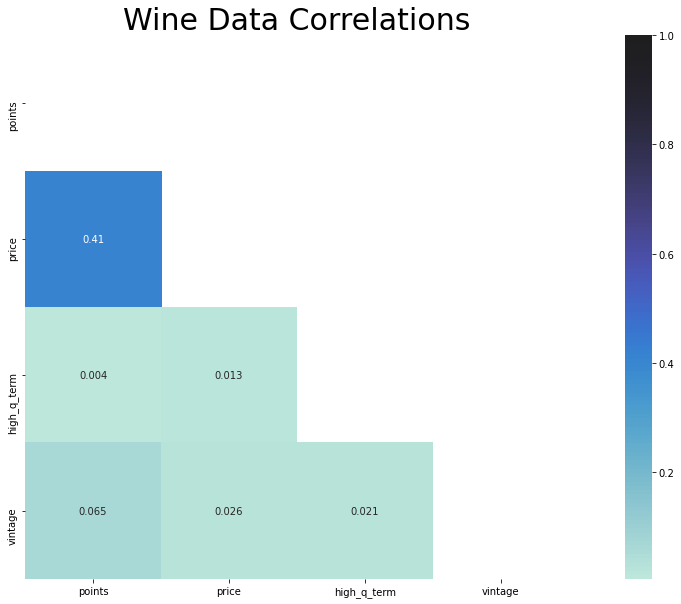

In [36]:
# Establish size of figure.
plt.figure(figsize=(20,10))
# add title
plt.title('Wine Data Correlations',fontsize=30)

# code to make heatmap a triangle (instead of square)
# found at python-graph-gallery.com/
matrix = np.triu(df.corr())

# sns code
sns.heatmap(df.corr(),
            center=True, #changes color - found by trial/error 
            annot=True, #annotate
            fmt ='.2g',
            square=True,
            mask=matrix
           );

**Interpretation**

- The only significant correlation in our numeric data is between Price and Review Score.

[Table of Contents](#Table-Of-Contents)
### Data Distributions

In [37]:
# Function to make horizontal distribution graphs
def data_distribution(df, column, title, xlabel,ylabel, values):
    
    fig = plt.figure(figsize=(6,6))
    ax = plt.gca()

    df[column].value_counts().head(values).plot(kind = 'barh',color='purple')

    ax.set_title(title, fontsize=26, pad=15)
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel(ylabel, fontsize=16)

    fig.tight_layout();

In [38]:
# Function to make vertical distribution graphs
def data_distribution_vert(df, column, title, xlabel,ylabel, values):

    fig = plt.figure(figsize=(8,6))
    ax = plt.gca()

    df[column].value_counts().sort_index().plot(kind = 'bar',color='purple')

    ax.set_title(title, fontsize=26, pad=15)
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel(ylabel, fontsize=16)

    fig.tight_layout();

#### Wines By Country

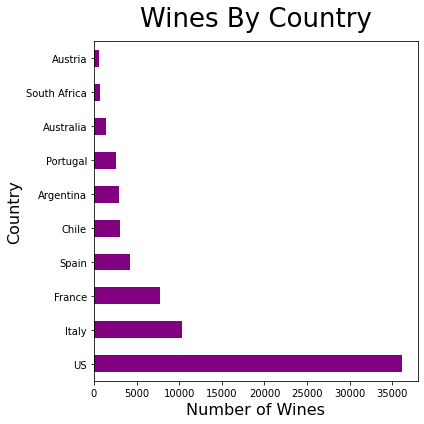

In [39]:
data_distribution(df,'country','Wines By Country', 'Number of Wines','Country',10)

**Interpretation**

- A vast percentage of the wines are from the US (just over half).
- Italy and France have over 7,500 wines each.
- Spain, Clile, Argentina and Portugal have over 2,500 wines each.

#### Wines By Vintage

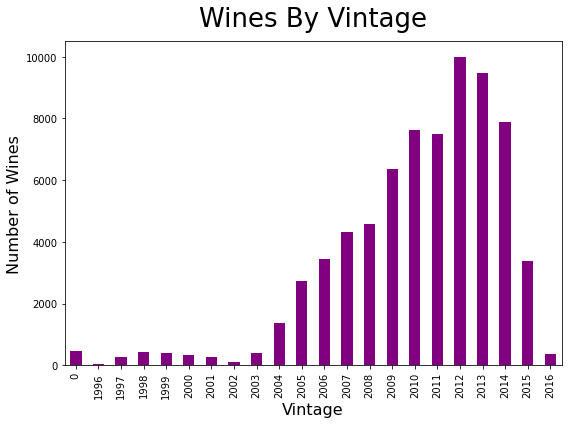

In [40]:
data_distribution_vert(df,'vintage','Wines By Vintage', 'Vintage','Number of Wines', 50)

**Interpretation**

- While, there is a small number of reviews for other years, the vast quantity of reviews in our dataset were done for wines with vintages between 2004 and 2015.
- The 0 vintage wines is for wines with no vintage listing


#### Wines By Variety

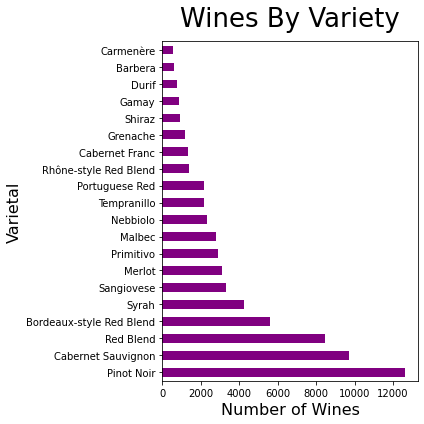

In [41]:
data_distribution(df,'variety','Wines By Variety', 'Number of Wines','Varietal', 20)

**Interpretation**

- Not surprisingly, the two most common varieties are wines that are grown in the US.
- There are 15 varieties with over 1,000 reviews which we can look at in further detail later.


#### Wines By Region

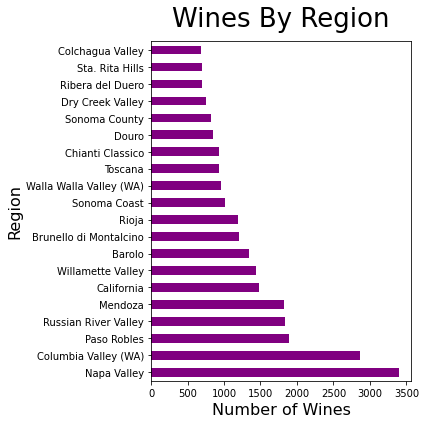

In [42]:
data_distribution(df,'region','Wines By Region', 'Number of Wines','Region', 20)

**Interpretation**

- Not surprisingly, most of the top regions are in the US.
- There are 11 regions with over 1,000 reviews which we can look at in further detail later.


#### Wine Score Distribution

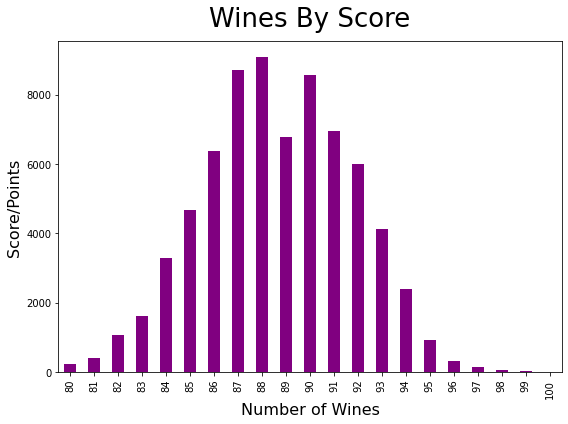

In [43]:
data_distribution_vert(df,'points','Wines By Score', 'Number of Wines','Score/Points', 20)


In [44]:
df.describe()

,points,price,high_q_term,vintage
count,71732.000000,71732.000000,71732.000000,71732.000000
mean,88.661727,40.143827,0.169534,1997.551330
std,3.094855,44.124935,0.375225,159.459368
min,80.000000,4.000000,0.000000,0.000000
25%,87.000000,20.000000,0.000000,2008.000000
50%,89.000000,30.000000,0.000000,2011.000000
75%,91.000000,50.000000,0.000000,2013.000000
max,100.000000,3300.000000,1.000000,2016.000000


**Interpretation**

- The wine scores are in a fairly normal distribition with a mean of 88.66 and a mode of 89.
- The lower occurrence of the 89 value could be interpreted lots of ways.
    * Perhaps the reviewers are hesitant ot get someone close to 90 and not reach that honor.


#### Special Designation Wines

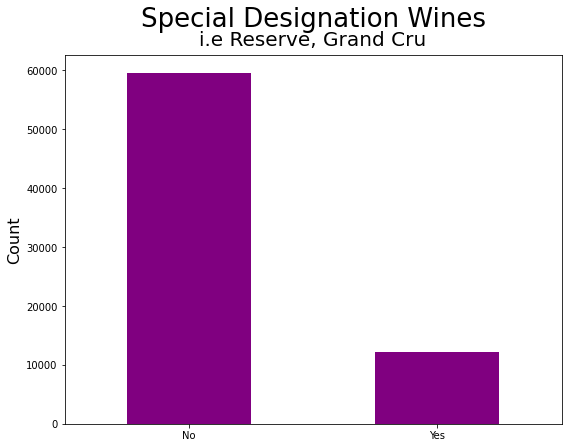

In [45]:
  # special graph need for this one to deal with changing 0 & 1 to No & Yes
fig = plt.figure(figsize=(8,6))
ax = plt.gca()

df['high_q_term'].value_counts().sort_index().plot(kind = 'bar',color='purple')

plt.xticks(np.arange(0, 1))
plt.xticks(np.arange(2), ['No', 'Yes'], rotation=0)

## Notice the addition of the suptitle to allow for the explanation of what this is.
ax.set_title('i.e Reserve, Grand Cru',fontsize=20,pad=10)
plt.suptitle('Special Designation Wines', y=1.03, x=.55,fontsize=26)
ax.set_ylabel('Count', fontsize=16)

fig.tight_layout();

**Interpretation**

- About 1/7 of our wines are a Reserve wine or similar desigmation.
- It seems that we may be overpaying for these wines. While their average score is only 0.03% higher, average price is 3.94% higher.
    + Average Score
        * Reserve:     88.69
        * Non-Reserve: 88.66    
    + Average Price
        * Reserve:     \$41.45
        * Non-Reserve: \$39.88

[Table of Contents](#Table-Of-Contents)
#### Wine Price Distribution

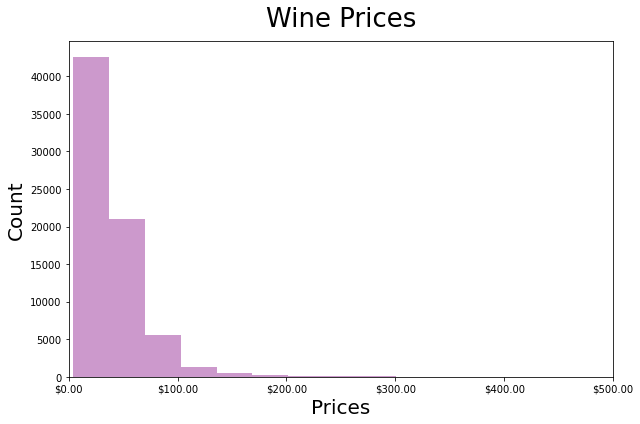

In [46]:
# special case graph again to deal with the currency values for the xticks

fig = plt.figure(figsize=(9,6))
ax = plt.gca()

sns.distplot(df['price'],bins=100, kde = False,color='purple')

# Format xticks to be in $ format
formatter = ticker.FormatStrFormatter('$%1.2f')
ax.xaxis.set_major_formatter(formatter)

plt.xlim([0, 500])

ax.set_title('Wine Prices', fontsize=26, pad=15)
ax.set_xlabel('Prices', fontsize=20)
ax.set_ylabel('Count', fontsize=20)

fig.tight_layout();

**Interpretation**

- About pricing data is certainly skewed right, so we tried logging it.

#### Logged Wine Price Distribution

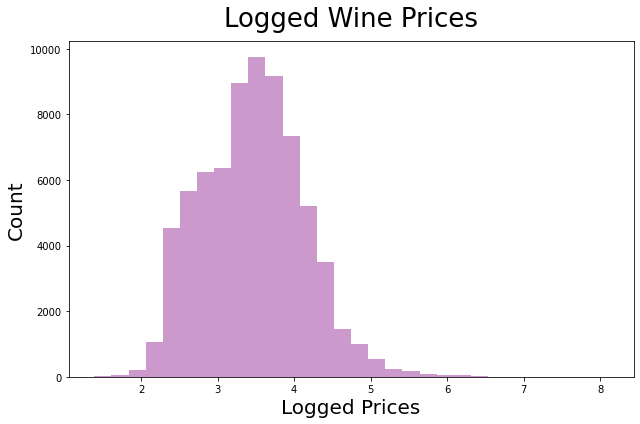

In [47]:
# special case graph again, this time to with the logged price
fig = plt.figure(figsize=(9,6))
ax = plt.gca()

sns.distplot(np.log(df['price']),bins=30, kde = False,color='purple')

ax.set_title('Logged Wine Prices', fontsize=26, pad = 15)
ax.set_xlabel('Logged Prices', fontsize=20)
ax.set_ylabel('Count', fontsize=20)

fig.tight_layout();

**Interpretation**

- The logged price distribution is fairly normal so we will use this as our regression target variable.

[Table of Contents](#Table-Of-Contents)
### Data Interations

#### Relationship of Wine Price & Review Score

In [48]:
# For each "points" value, determining mean "price" and mean logged "price"
y2 = range(80,101)
x2 = []
x3 = []

for y_value in y2:
    point = df['points'] == y_value
    x2.append(df.groupby(point)['price'].mean()[1])
    x3.append(np.log((df.groupby(point)['price'].mean()[1])))

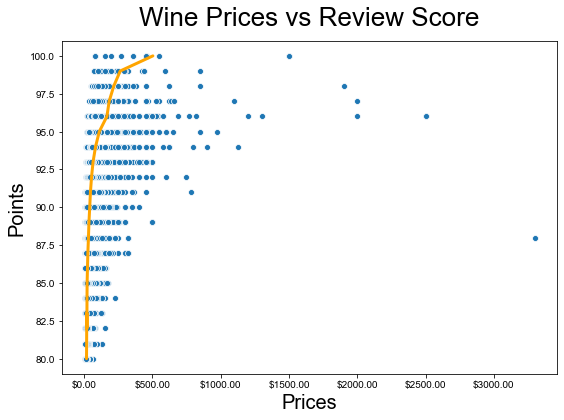

In [49]:
# Scatterplot of Price vs Score/Points
# establish figure and axes objects
fig = plt.figure(figsize=(8,6))
ax = plt.gca()

# plotting prices x score
sns.scatterplot(x=df['price'], y=df['points'])
sns.set(rc={"lines.linewidth": 3})
# adding line for avg. price x score
sns.lineplot(x=x2, y=y2,color='orange')

# Format xticks to be in $ format
formatter = ticker.FormatStrFormatter('$%1.2f')
ax.xaxis.set_major_formatter(formatter)

## Notice the change to the method names ##
ax.set_title('Wine Prices vs Review Score', fontsize=26, pad=15)
ax.set_xlabel('Prices', fontsize=20)
ax.set_ylabel('Points', fontsize=20)

fig.tight_layout();

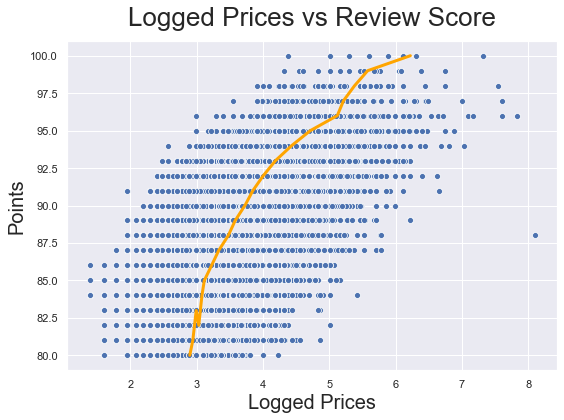

In [50]:
# We do the same graph looking at the logged price
# establish figure and axes objects
fig = plt.figure(figsize=(8,6))
ax = plt.gca()

# supply ax to the pandas plotting method
sns.scatterplot(x=np.log(df['price']), y=df['points'])
sns.set(rc={"lines.linewidth": 3})
sns.lineplot(x=x3, y=y2,color='orange')

## Notice the change to the method names ##
ax.set_title('Logged Prices vs Review Score', fontsize=26, pad=15)
ax.set_xlabel('Logged Prices', fontsize=20)
ax.set_ylabel('Points', fontsize=20)

fig.tight_layout();

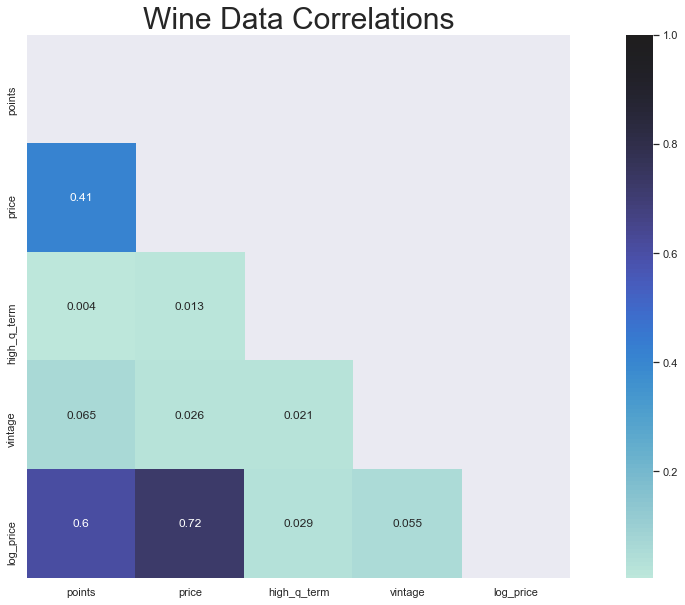

In [51]:
# Now, we revisit correlation, this time adding log-price
df_log = df
df_log['log_price'] = np.log(df['price'])

# Establish size of figure.
plt.figure(figsize=(20,10))
# add title
plt.title('Wine Data Correlations',fontsize=30)

# code to make heatmap a triangle (instead of square)
# found at python-graph-gallery.com/
matrix = np.triu(df.corr())

# sns code
sns.heatmap(df_log.corr(),
            center=True, #changes color - found by trial/error 
            annot=True, #annotate
            fmt ='.2g',
            square=True,
            mask=matrix
           );

**Interpretation**

- In each of the first two graphs, we see a pretty tight relationship between price and review score. 
    * Note that the average price goes sharply higher as scores approach 100. As we saw above, scores over 95 are extremely rare and prices for these wines seem to be abnormally high to take advanatage.
- The second graph supports our use of the logged price for our model as we see our average price lying right in the center of the range of prices.
    * Even here, we still see a premium being charged for the high-rated wines.
- We've added the log-price to our correlations matrix and we see that the price/points correlation goes from 41% to 60% when we log the price. 
    * This is certainly a good start towards explaining the variance.

[Table of Contents](#Table-Of-Contents)
#### Cost-Per-Point Analysis

In [52]:
# creating new column  to give us price per point awarded in the review
df['value_per_point'] = df['price']/df['points']

In [53]:
# building matching lists of varieties, value counts and average value-per-point 
varieties = df['variety'].value_counts().sort_index().keys().tolist()
number_of_wines = df['variety'].value_counts().sort_index().tolist()
avg_value_per_point = df.groupby('variety')['value_per_point'].mean().sort_index().tolist()

In [54]:
# Building a new dataframe with these figures
df_vintage_stats = pd.DataFrame()
df_vintage_stats['variety'] = varieties
df_vintage_stats['count'] = number_of_wines
df_vintage_stats['cost_per_point'] = avg_value_per_point

In [55]:
# Using a mask to create a list with only vintages that have more than 1000 wines in the data
over_1000 = df_vintage_stats['count'] >= 1000
df_vintage_stats = df_vintage_stats.loc[over_1000]

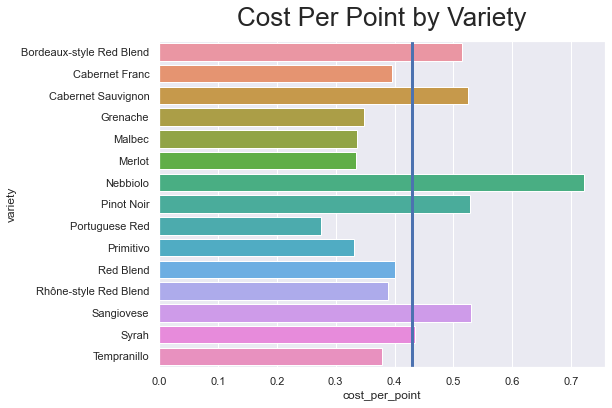

In [56]:
# Graphing cost-per-point by Variety

plt.figure(figsize=(8,6))
plt.title('Cost Per Point by Variety',fontsize=26, pad = 15)

ax1 = sns.barplot(x= 'cost_per_point',y='variety',data=df_vintage_stats, orient='h')
# Adding line for overall mean cost-per-point 
ax2 = plt.axvline(.43, 0,1)



**Interpretation**

- The mean cost_per_point is represented by the blue line so we can see which of the top 15 vintages have a higher cost per point and which have a lower one.
    - This analysis hinges on the idea that a rating for one type of wine can be equated with the same score for another.
    - The consensus on our team is that we like Rhone wine so it's nice to see it under the mean. We are going to do some sampling of Primitive, Malbec and some Portuguese reds.
    - The data can also be shared for other vintages which did not have over 1,000 wines in the data.

In [57]:
# SAME PROCESS AS ABOVE BUT FOR REGION
regions = df['region'].value_counts().sort_index().keys().tolist()
number_of_wines = df['region'].value_counts().sort_index().tolist()
avg_value_per_point = df.groupby('region')['value_per_point'].mean().sort_index().tolist()

In [58]:
df_region_stats = pd.DataFrame()
df_region_stats['region'] = regions
df_region_stats['count'] = number_of_wines
df_region_stats['cost_per_point'] = avg_value_per_point

In [59]:
over_1000 = df_region_stats['count'] >= 1000
df_region_stats = df_region_stats.loc[over_1000]

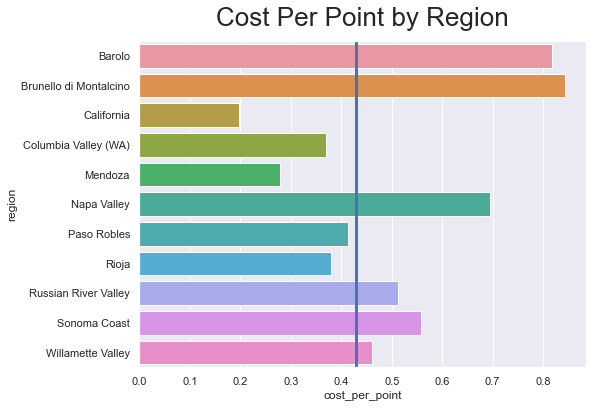

In [60]:
plt.figure(figsize=(8,6))
plt.title('Cost Per Point by Region',fontsize=26, pad = 15)

ax1 = sns.barplot(x= 'cost_per_point',y='region',data=df_region_stats, orient='h')

ax2 = plt.axvline(.43, 0,1)

**Interpretation**

- Rioja (from Spain), Columbia Valle (from Washington State), Paso Robles (from California) and Mendoza (from Argetntina) are all regions that had low costs per point.
- The California region is probably at a low cost for a reason. Clearly, we aren't talking about wines from Napa or Sanoma.
- Again, it should be noted that we have data for several more regions, some with 100s of wine in the data.

In [61]:
# SAME PROCESS AS ABOVE BUT FOR VINTAGE
vintage = df['vintage'].value_counts().sort_index().keys().tolist()
number_of_wines = df['vintage'].value_counts().sort_index().tolist()
avg_value_per_point = df.groupby('vintage')['value_per_point'].mean().sort_index().tolist()

In [62]:
df_vintage_stats = pd.DataFrame()
df_vintage_stats['vintage'] = vintage
df_vintage_stats['count'] = number_of_wines
df_vintage_stats['cost_per_point'] = avg_value_per_point

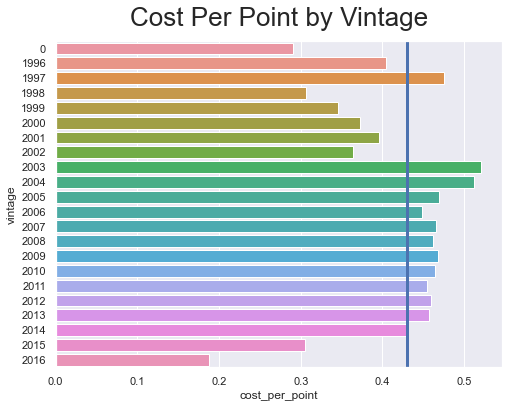

In [63]:
plt.figure(figsize=(8,6))
plt.title('Cost Per Point by Vintage',fontsize=26, pad = 15)

ax1 = sns.barplot(x= 'cost_per_point',y='vintage',data=df_vintage_stats, orient='h')

ax2 = plt.axvline(.43, 0,1)

**Interpretation**

- It is hard to truly interpret the cost per point by vintage. So much is tied up with the vintage and, since we are dealing with wines from all over the world, a bad year in one place should cancel out a good year someplace else.
- The one item thing that I think we can say from this is that the young wines from 2015 and 2016 (the data is from 2017) are probaly at a lower cost per point because many of them are too early to drink so they are being sold at lower prices.

In [64]:
# SAME PROCESS AS ABOVE BUT FOR DESIGNATION
designation = df['high_q_term'].value_counts().sort_index().keys().tolist()
number_of_wines = df['high_q_term'].value_counts().sort_index().tolist()
avg_value_per_point = df.groupby('high_q_term')['value_per_point'].mean().sort_index().tolist()

In [65]:
df_vintage_stats = pd.DataFrame()
df_vintage_stats['high_q_term'] = designation
df_vintage_stats['count'] = number_of_wines
df_vintage_stats['cost_per_point'] = avg_value_per_point

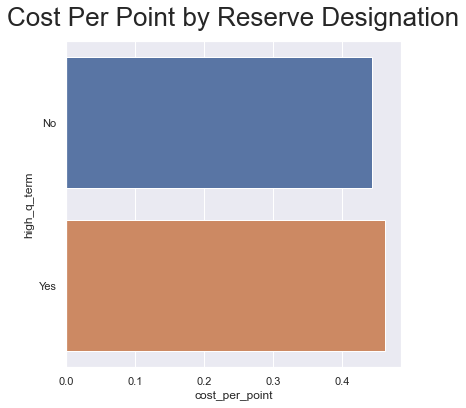

In [66]:
plt.figure(figsize=(6,6))
plt.title('Cost Per Point by Reserve Designation',fontsize=26, pad = 15)

ax1 = sns.barplot(x= 'cost_per_point',y='high_q_term',data=df_vintage_stats, orient='h')

plt.yticks(np.arange(0, 1))
plt.yticks(np.arange(2), ['No', 'Yes'], rotation=0)

ax.set_xlabel('Cost per Point', fontsize=14)
ax.set_ylabel('Word', fontsize=14);

**Interpretation**

- This graph is surprising.  
    - Given the pricing and review data we looked at above, we would would have expected a larger gap here.

[Table of Contents](#Table-Of-Contents)
### Review Word Frequency Analysis 

In [68]:
# Creating function to instantiate and fit CountVectorizer
def count_vec(df,column,plt_title):
    cvec = CountVectorizer(lowercase=True, 
                       ngram_range = (1,1),
                       stop_words=(stopwords.words('english'))
                       ) 

    X_text = cvec.fit_transform(df[column])
    X_text_df = pd.DataFrame(X_text.toarray(), 
                         columns=cvec.get_feature_names())
    word_list = X_text_df.columns.tolist()
    sum_list = [X_text_df[column].sum() for column in X_text_df.columns]
    
    # building dataframe of words and counts
    word_sums = pd.DataFrame()
    word_sums['Word'] = word_list
    word_sums['Count']  = sum_list
    word_sums_30 = word_sums.sort_values('Count', ascending=False).head(30)

    fig = plt.figure(figsize=(8,7))
    ax = plt.gca()

    sns.barplot(data=word_sums_30, y="Word", x='Count',palette="autumn",ax=ax)

    ax.set_title(plt_title, fontsize=26, pad=20)
    ax.set_xlabel('Count', fontsize=14)
    ax.set_ylabel('Word', fontsize=14)

    fig.tight_layout()

In [69]:
# Creating separate DataFrame for wines under $40
df_under = df[df['price'] < 40]

In [70]:
# Creating separate DataFrame for wines $40 and over
df_over = df[df['price'] >= 40]

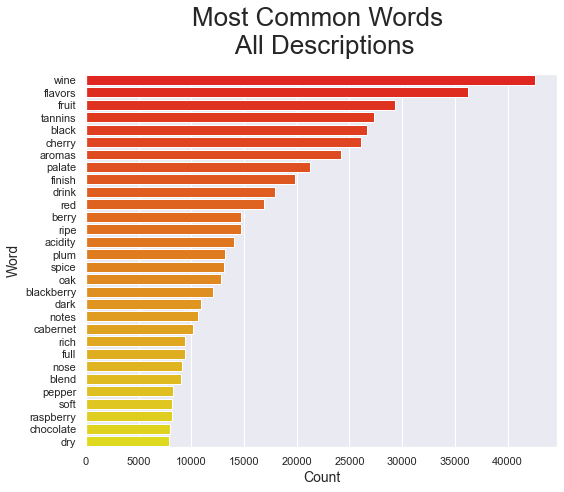

In [71]:
# calling vectorizer function for the description column, in this case looking at all rows
all_words = count_vec(df,'description','Most Common Words \n All Descriptions')

**Interpretation**

- These are the 30 most common words used in the review descriptions for all of our wines.
    - Given that all of our wines are reds, it is not surprising to see terms like tannins, black, cherry, oak (for the barrels), dark, and cabernet in the list 

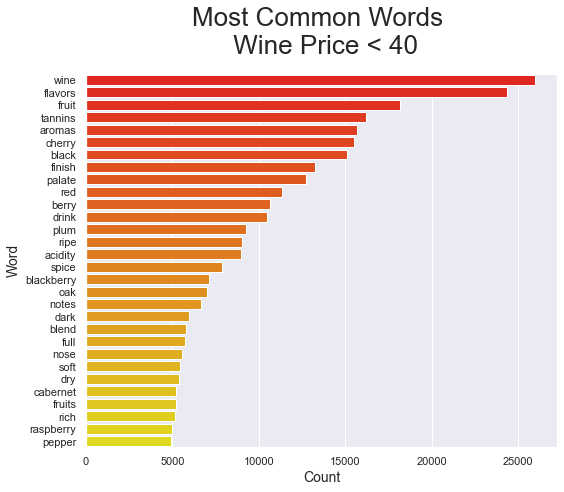

In [72]:
# calling vectorizer function for the description column, in this case for the wines under $40
df_under_words = count_vec(df_under,'description','Most Common Words \n Wine Price < 40')

**See interpretation below**

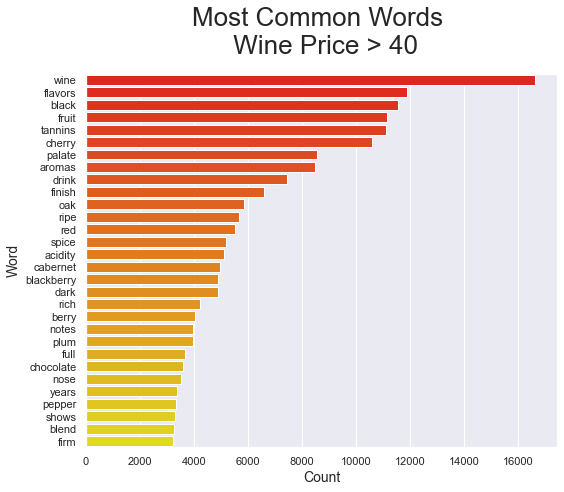

In [90]:
# calling vectorizer function for the description column, in this case for the wines $40 and over
df_over_words = count_vec(df_over,'description', 'Most Common Words \n Wine Price > 40')

**See interpretation below**

In [74]:
# function to build dataframes with the top 30 words ranked 1 to 30 
def vector_func(df,column_name,rank_name):
    cvec = CountVectorizer(lowercase=True, ngram_range = (1,1), stop_words=(stopwords.words('english'))) 
    X_text = cvec.fit_transform(df[column_name])
    X_text_df = pd.DataFrame(X_text.toarray(), columns=cvec.get_feature_names())
    word_list_func = X_text_df.columns.tolist()
    sum_list_func = [X_text_df[column].sum() for column in X_text_df.columns]
    word_sums = pd.DataFrame()
    word_sums['word'] = word_list_func
    word_sums['sum']  = sum_list_func
    word_sums_30 = word_sums.sort_values('sum', ascending=False).head(30)
    word_sums_30[rank_name] = [n for n in range(1,31)]
    word_sums_30.drop(columns='sum',inplace=True)
    return word_sums_30

In [75]:
# Calling function for each NLP grouping
df_rank_nlp = vector_func(df, 'description', 'All')
df_rank_nlp_over  = vector_func(df_over, 'description','Price_Over_40')
df_rank_nlp_under  = vector_func(df_under, 'description','Price_Under_40')


In [76]:
# Merging dataframes together and displaying
merge_1 = pd.merge(df_rank_nlp,df_rank_nlp_over,how='outer',on='word')
merge_final = pd.merge(merge_1,df_rank_nlp_under,how='outer',on='word')

merge_final

,word,All,Price_Over_40,Price_Under_40
0,wine,1.0,1.0,1.0
1,flavors,2.0,2.0,2.0
2,fruit,3.0,4.0,3.0
3,tannins,4.0,5.0,4.0
4,black,5.0,3.0,7.0
5,cherry,6.0,6.0,6.0
6,aromas,7.0,8.0,5.0
7,palate,8.0,7.0,9.0
8,finish,9.0,10.0,8.0
9,drink,10.0,9.0,12.0


In [77]:
# Creating lists, the first 4 to highlight rows, the last two to cut the dataframe into 2
# key lists
all_over = [5,17,21,22,29]
all_under = [12,15,25,27,28,30]
over_list = [26,28,30]
under_list = [27]

over_all  = [4,16,20,21,28,30,31,32]
under_all = [11,14,24,26,27,29,33]

In [78]:
# using last two lists to create reduced dataframes
merge_final_over = merge_final.loc[over_all,:]
merge_final_under = merge_final.loc[under_all,:]

In [79]:
# Setting up highlighting
def highlight(s):
    if s.All in all_over:
        return ['background-color: yellow']*4
    elif s.All in all_under:
        return ['background-color: lightgreen']*4
    elif s.Price_Over_40 in over_list:
        return ['background-color: yellow']*4
    elif s.Price_Under_40 in under_list:
        return ['background-color: lightgreen']*4
    else:
        return ['background-color: white']*4

In [80]:
# Creating DataFrame of key words that are more used for wines that are over $40 
merge_final_over.style.apply(highlight, axis=1).hide_index()

word,All,Price_Over_40,Price_Under_40
black,5.000000,3.000000,7.000000
oak,17.000000,11.000000,18.000000
cabernet,21.000000,16.000000,26.000000
rich,22.000000,19.000000,28.000000
chocolate,29.000000,24.000000,nan
years,nan,26.000000,nan
shows,nan,28.000000,nan
firm,nan,30.000000,nan


**Interpretation**

- This chart of shows us the words where the ranking for the wines over \\$40 was at least four above the ranking for the wines that are under $40.
    - Oak makes sense since aging in this wood is seen as premium.
    - 'cabernet' in this list but neither 'pinot' nor 'noir', which is certainly interesting given that there are nearly 3,000 more pinot noirs in the dataset.
    - Years also makes sense because longer aging typically is associated with higher price.
    - The other terms here are black, rich, chocolate, shows and firm. 
    

In [81]:
# Creating DataFrame of key words that are more used for wines that are under $40 
merge_final_under.style.apply(highlight, axis=1).hide_index()

word,All,Price_Over_40,Price_Under_40
berry,12.000000,20.000000,11.000000
plum,15.000000,22.000000,13.000000
blend,25.000000,29.000000,21.000000
soft,27.000000,nan,24.000000
raspberry,28.000000,nan,29.000000
dry,30.000000,nan,25.000000
fruits,nan,nan,27.000000


**Interpretation**

- This chart of shows us the words where the ranking for the wines under \\$40 was at least four above the ranking for the wines that are over $40.
    - Terms like berry, plum, soft, raspberry and fruits can all be associated with lighter, sweeter wines - we will follow this theory up by paying attention to sweeter varietals and how they affect price.
    - Blends are typically less expensive so it makse sense to see that here.
    - We would have expected to see the word dry in the other list but perhaps it is just exoected with more expensive wine and mentioned more often in reviews for less expensive wines.


**Interpretation**

[Table of Contents](#Table-Of-Contents)
### Post-EDA Data Preparation

In [82]:
# converting vintage column into a years old column
# no vintange wines are given the age of 0
df['vintage'] = [0 if year == 0 else (2017 - year) for year in df['vintage']]

In [83]:
# dropping columns used for EDA
df.drop(columns=['log_price', 'value_per_point','description'], inplace=True)

In [84]:
# Saving dataframe for use in KPrototypes (which does the dummy work itself)
df.to_csv('./data/clean_eda_data_kmodes.csv',index=False)

In [85]:
# creating dummies for country, variety and region columns
#  not dropping first column due to next step
df = pd.get_dummies(df, columns=['country','variety','region'], drop_first= False)

In [86]:
# Creating lists of low occurence columns which were created by the dummy process
region_delete_list = ["region_Valtellina Superiore","region_Rheinhessen","region_Fort Ross-Seaview","region_Salice Salentino","region_Nebbiolo d'Alba","region_Terra Alta","region_Valle de Guadalupe","region_Montecucco","region_Valdepeñas","region_Columbia Gorge (OR)","region_Marin County","region_Barbera d'Alba Superiore","region_Fronton","region_Campania","region_Côtes du Rhône Villages","region_Pays d'Oc","region_Grand Valley","region_Mendoza Province","region_Gattinara","region_Juliénas","region_Clos de Vougeot","region_New Mexico","region_Peumo","region_Cortona","region_Chiroubles","region_Bergerac","region_Isola dei Nuraghi","region_Swartland","region_Templeton Gap District","region_Crozes-Hermitage","region_Robertson","region_Minervois","region_Fronsac","region_Primitivo di Manduria","region_Canelones","region_Dominio de Valdepusa","region_Texas","region_Colli della Toscana Centrale","region_Listrac-Médoc","region_Fiddletown","region_Kakheti","region_Corton","region_Bandol","region_Sagrantino di Montefalco","region_Sant'Antimo","region_Neuquén","region_Fair Play","region_Chianti Colli Senesi","region_Montagne-Saint-Émilion","region_Calchaquí Valley","region_Saint-Amour","region_Cornas","region_Cannonau di Sardegna","region_Gigondas","region_Coteaux d'Aix-en-Provence","region_Elqui Valley","region_Heathcote","region_Redwood Valley","region_Catalunya","region_Castel del Monte","region_Moulis-en-Médoc","region_Seneca Lake","region_Santenay","region_Saint-Joseph","region_San Benito County","region_Bío Bío Valley","region_Echézeaux","region_Veneto","region_Côte Rôtie","region_Penedès","region_Western Australia","region_Langhorne Creek","region_Moldova","region_Côte de Brouilly","region_Roero","region_Argentina","region_Chile","region_San Antonio","region_Yolo County","region_Simonsberg-Stellenbosch","region_High Valley","region_Hermitage","region_Salta","region_Lake Chelan","region_Côtes de Gascogne","region_Aloxe-Corton","region_Suisun Valley","region_Cigales","region_Puisseguin Saint-Émilion","region_Piave","region_Adelaide Hills","region_Clarendon","region_Hudson River Region","region_Lussac Saint-Émilion","region_Victoria","region_Côtes de Bergerac","region_Spain","region_Leithaberg","region_Pfalz","region_Perdriel","region_Paicines","region_Long Island","region_Marchigue","region_Coteaux du Languedoc","region_Côtes du Marmandais","region_Upper Galilee","region_Ribeira Sacra","region_Solano County","region_Almansa","region_Lontué Valley","region_Chorey-lès-Beaune","region_Old Mission Peninsula","region_Naoussa","region_Peloponnese","region_Clear Lake","region_Estremadura","region_Vigneti delle Dolomiti","region_Chianti Colli Fiorentini","region_Beira Interior","region_Temecula","region_Vacqueyras","region_Mittelburgenland","region_Côtes du Roussillon Villages","region_Padthaway","region_Terre del Volturno","region_Corbières","region_Carmignano","region_Coteaux Bourguignons","region_Givry","region_Cerasuolo di Vittoria","region_Veronese","region_Francs Côtes de Bordeaux","region_Valpolicella Superiore Ripasso","region_Rosso del Veronese","region_Colorado","region_Cienega Valley","region_Ghemme","region_Saint-Nicolas-de-Bourgueil","region_Yecla","region_Moon Mountain District Sonoma County","region_Uruguay","region_Chianti Superiore","region_Lirac","region_Río Negro Valley","region_Maipú","region_Ventoux","region_Vittoria","region_Sforzato di Valtellina","region_Saumur-Champigny","region_Villány","region_Naches Heights","region_Mornington Peninsula","region_Faugères","region_Buzet","region_Costers del Segre","region_Régnié","region_Mokelumne River","region_Rosso Conero","region_Montepulciano d'Abruzzo Colline Teramane","region_Bourgueil","region_Shenandoah Valley","region_Missouri","region_Cochise County","region_Palmela","region_Côte de Nuits-Villages","region_Loncomilla Valley","region_Eisenberg","region_Saint-Chinian","region_Puente Alto","region_Sangiovese di Romagna Superiore","region_Dealu Mare","region_Cerasuolo di Vittoria Classico","region_Rosso Piceno","region_Southwest France","region_Wellington","region_Middleburg","region_El Dorado County","region_Hunter Valley","region_Württemberg","region_Aegean","region_Napa County-Sonoma County","region_Bourgogne Hautes Côtes de Nuits","region_Tasmania","region_Sonoma County-Napa County","region_Val di Cornia Suvereto","region_Chénas","region_Morey-Saint-Denis","region_Charmes-Chambertin","region_Menetou-Salon","region_Clements Hills","region_Marche","region_Alto Valle del Río Negro","region_Empordà","region_Columbia Gorge (WA)","region_Bordeaux Clairet","region_Marsannay","region_Elkton Oregon","region_Chambertin","region_Dunnigan Hills","region_Côtes du Roussillon","region_Vienna","region_Anjou","region_Bekaa Valley","region_Côtes du Tarn","region_Colline Novaresi","region_Duriense","region_Turkey","region_Conero","region_Juanico","region_Ica","region_Valpolicella Ripasso","region_Ankara","region_Monferrato","region_Valdeorras","region_Israel","region_Chiles Valley","region_Coste della Sesia","region_Bendigo","region_Lolol Valley","region_Lake Michigan Shore","region_Vista Flores","region_Drama","region_Pennsylvania","region_Great Southern","region_Carneros-Napa Valley","region_Zenata","region_Napa-Sonoma","region_Hautes Côtes de Nuits","region_Ribatejano","region_Pernand-Vergelesses","region_Progreso","region_Bardolino","region_Viile Timisului","region_San Francisco Bay","region_Setubal","region_Samson","region_Minervois La Liviniere","region_Ben Lomond Mountain","region_Manchuela","region_Potter Valley","region_Valpolicella Classico Superiore","region_Fixin","region_Aconcagua Costa","region_Eger","region_Corse","region_Elgin","region_Beiras","region_Serra Gaúcha","region_Nelson","region_Orcia","region_Delle Venezie","region_Aglianico del Taburno","region_Limestone Coast","region_Pyrenees","region_Galil","region_Apalta","region_Ruché di Castagnole Monferrato","region_Premieres Côtes de Bordeaux","region_Texas High Plains","region_Bramaterra","region_Cayuga Lake","region_Montravel","region_Vino Spumante","region_Molise","region_Barbera d'Asti Superiore Nizza","region_Crémant de Bourgogne","region_Ribatejo","region_Valpolicella Superiore","region_Vinos de Madrid","region_Uclés","region_Humboldt County","region_Rheingau","region_Wagram","region_Cucamonga Valley","region_Clos de la Roche","region_Swan Creek","region_Les Baux de Provence","region_Northern Sonoma","region_Sonoma-Napa","region_Colchagua Costa","region_Rosso Piceno Superiore","region_Canon-Fronsac","region_Shomron","region_Lazio","region_Famatina Valley","region_Chambertin Clos de Bèze","region_Portuguese Table Wine","region_Vin de Liqueur","region_Australia","region_Cauquenes Valley","region_Goriska Brda","region_Romania","region_Côte Chalonnaise","region_Touraine","region_Danube River Plains","region_Saint-Mont","region_San Luis Obispo","region_Trentino","region_North Dalmatia","region_Extremadura","region_Awatere Valley","region_Lessona","region_Valpolicella","region_Franschhoek","region_Anjou Villages Brissac","region_Bolgheri Sassicaia","region_Faro","region_Vino da Tavola","region_Itata Valley","region_Neusiedlersee","region_Montescudaio","region_Piedmont","region_Languedoc","region_Pine Mountain-Cloverdale Peak","region_York Mountain","region_Chassagne-Montrachet","region_Ahr","region_Vi de la Terra Mallorca","region_Calabria","region_Corbières-Boutenac","region_Vi de la Terra Illes Balears","region_Sangiovese di Romagna","region_El Pomar District","region_Buin","region_Waipara Valley","region_Coteaux du Giennois","region_Niagara Peninsula","region_Istria","region_Terra degli Osci","region_Madera","region_Premieres Côtes de Blaye","region_Eden Valley","region_Pangeon","region_Côte de Beaune-Villages","region_Arizona","region_Savoie","region_Cava","region_Leelanau Peninsula","region_Tierra de Castilla","region_Santa Barbara","region_Rhône Valley","region_Rosso di Toscana","region_Venezie","region_Crete","region_Montevideo","region_Thracian Lowlands","region_Santa Margarita Ranch","region_Pemberton","region_Marcillac","region_Florina","region_Rutherglen","region_Teroldego Rotaliano","region_Tikves","region_Algarve","region_Tierra del Viños de Zamora","region_Nagambie Lakes","region_Pécharmant","region_Santa Cruz","region_Michigan","region_Lebanon","region_San Antonio Valley","region_Noto","region_Hemel en Aarde","region_Rully","region_Côtes du Lot","region_Wagram-Donauland","region_Frankland River","region_France Other","region_Vittoria Frappato","region_Monica di Sardegna","region_Tierra de León","region_Obidos","region_Pla de Bages","region_Valpolicella Classico","region_Mount Harlan","region_Canterbury","region_Italy","region_Tulbagh","region_Boca","region_Côtes du Roussillon Villages Tautavel","region_Patrimonio","region_Conca de Barberà","region_Contessa Entellina","region_Val di Neto","region_Bardolino Chiaretto","region_Constantia","region_Bordeaux Rosé","region_Cirò","region_Fitou","region_Terre di Chieti","region_Beira Atlantico","region_Anjou Villages","region_Pirque","region_The Hamptons, Long Island","region_Crémant d'Alsace","region_Tulum Valley","region_Thrace","region_South Island","region_Beaujolais Rosé","region_Campi Flegrei","region_Torgiano","region_Elazığ","region_Alella","region_Saddle Rock-Malibu","region_Mosel","region_Terras do Sado","region_Trás-os-Montes","region_Vin de Table Francais","region_Vale dos Vinhedos","region_Emilia-Romagna","region_Durbanville","region_Dealurile Munteniei","region_Amyndeon","region_Salina","region_Bardolino Classico","region_Eloro","region_Franken","region_Clos Saint-Denis","region_Latricières-Chambertin","region_Wairau Valley","region_Barbera del Monferrato","region_Guenoc Valley","region_Molina","region_Forlì","region_Banyuls","region_Grands-Echezeaux","region_Placer County","region_Gioia del Colle","region_Arbois","region_Romanée-St.-Vivant","region_Alenquer","region_Vino de la Tierra del Bajo Aragón","region_San Lucas","region_Jonkershoek Valley","region_Chapelle-Chambertin","region_Greece","region_Alta Valle della Greve","region_Corton Vergennes","region_Walker Bay","region_Mount Barker","region_Niagara Escarpment","region_Colli Bolognesi","region_Vino de la Tierra de Cádiz","region_Beaujolais-Leynes","region_Sannio","region_Nashik","region_San Clemente","region_Santa Clara County","region_Bourgogne Hautes Côtes de Beaune","region_Vin de Savoie","region_Augusta","region_Gers","region_Macedonia","region_Yadkin Valley","region_Barco Reale di Carmignano","region_Loire Valley","region_Atlantida","region_Wairarapa","region_Jerusalem Hills","region_Cirò Classico","region_Monteregio di Massa Marittima","region_Waiheke Island","region_Ella Valley","region_Venezia Giulia","region_Basilicata","region_Moravia","region_Valtellina","region_Saumur","region_Chianti Montespertoli","region_Monthélie","region_San Carlos","region_Atalanti Valley","region_Lacryma Christi del Vesuvio","region_Erice","region_Saint-Georges-Saint-Émilion","region_Bourgogne Epineuil","region_Reuilly","region_Epanomi","region_Coteaux Varois","region_Côtes de Duras","region_Rio Claro","region_Barbera del Monferrato Superiore","region_Sopron","region_Pompeiano","region_California Other","region_Central Ranges","region_Haut-Judeé","region_Tarragona","region_Ribera del Guadiana","region_Wrattonbully","region_Chianti Montalbano","region_Côtes de Provence Sainte-Victoire","region_Coteaux du Languedoc Pic Saint Loup","region_Ukraine","region_Waipara","region_Spanish Islands","region_Nevada","region_Marca Trevigiana","region_Solano County Green Valley","region_Val de Loire","region_Recioto della Valpolicella Classico","region_Irancy","region_Virginia's Eastern Shore","region_Costa d'Amalfi","region_Choapa Valley","region_Vale Trentino","region_Philadelphia","region_Tuolumne County","region_Vinho Verde","region_Chianti Colli Aretini","region_Ladoix","region_Saint-Aubin","region_Podunavlje","region_Contea di Sclafani","region_Terras do Dão","region_Negev Hills","region_Malibu-Newton Canyon","region_Napa-Mendocino-Sonoma","region_Carema","region_Beneventano","region_Golan Heights","region_Malibu Coast","region_Nahe","region_Rapsani","region_Costa Toscana","region_Primitivo del Salento","region_Vin Mousseux","region_Lenswood","region_Sonoma County-Monterey County","region_Vin de Pays Var","region_Taburno","region_Halkidiki","region_Falerno del Massico","region_Austria","region_Bourgogne Gamay","region_Cephalonia","region_Rivesaltes","region_Brda","region_Nevada County","region_Niagara-On-The-Lake","region_Alta Mesa","region_Orange","region_Vin Santo di Montepulciano","region_Lago di Corbara","region_Friuli Grave","region_Copertino","region_Durazno","region_Columbia Valley-Walla Walla Valley","region_Bonnes-Mares","region_Rahovec Valley","region_San Bernabe","region_South Africa","region_Vin de Pays de Vaucluse","region_San Francisco Bay-Livermore Valley","region_Sonoma County-San Joaquin County","region_Ile de Beauté","region_Adelaide Plains","region_Minho","region_Mazis-Chambertin","region_Corton-Bressandes","region_Adelaide","region_Strathbogie Ranges","region_Sainte-Foy Bordeaux","region_New South Wales","region_Auxey-Duresses","region_Cappadocia","region_Weinland Österreich","region_Riverina","region_Madrid","region_Colli Orientali del Friuli","region_Ribera del Júcar","region_Napa County-Sonoma County-Lake County","region_Südoststeiermark","region_Biferno Rosso","region_Vin de Pays des Côtes Catalanes","region_Cederberg","region_Kelsey Bench-Lake County","region_Vin de Pays du Comté Tolosan","region_Central Victoria","region_Darling","region_Štajerska","region_Kamptal","region_La Romanée","region_New Jersey","region_Vin de Pays de la Méditerranée","region_Ardèche","region_Rasteau","region_Colli di Salerno","region_Ancient Lakes","region_San Jose","region_Grampians","region_Vino de la Tierra de Castelló","region_Cheverny","region_Achaia","region_Côtes de Castillon","region_La Rioja","region_Switzerland","region_Maranges","region_Colli di Conegliano","region_Corse Porto Vecchio","region_Vin Doux Naturel Rasteau","region_Columbia Valley","region_Alghero","region_Côte Roannaise","region_Colli di Faenza","region_Goumenissa","region_Cesanese del Piglio","region_Santorini","region_King Valley","region_Vin de Pays de Velvendo","region_Rubicone","region_Colli Perugini","region_Gundagai","region_San Antonio de las Minas Valley","region_Pomino","region_Western Plains","region_Gutturnio Colli Piacentini","region_Controguerra","region_Vin de Pays des Côtes de Gascogne","region_Kras","region_Monreale","region_San Vicente","region_Luberon","region_Languedoc-Roussillon","region_Rueda","region_Coteaux Varois en Provence","region_North Carolina","region_Vino de Mesa","region_Garda","region_Breedekloof","region_Mount Athos","region_Hilltops","region_Casablanca & Leyda Valleys","region_Fleurieu Peninsula","region_Menfi","region_Vin de Pays de l'Ile de Beauté","region_Attica","region_Italy Other","region_Vino de la Tierra Altiplano de Sierra Nevada","region_Similkameen Valley","region_Guerrouane","region_Cabardes","region_Brulhois","region_Côtes de Nuits Villages","region_Fruška Gora","region_Vin de Pays de L'Aude","region_Barbera di Piemonte","region_Pago de Arínzano","region_Mamertino","region_Carignano del Sulcis","region_Aglianico del Beneventano","region_Amindeo","region_Amador-Napa","region_Vino da Mesa de Toledo","region_Polk County","region_Vipavska Dolina","region_Vino de Calidad de Valtiendas","region_Mentrida","region_Abruzzo","region_Côtes du Luberon","region_Lime Kiln Valley","region_Atlantique","region_Vin Santo del Chianti Classico","region_Zonda Valley","region_Monterrei","region_Negev","region_Groenekloof","region_Var","region_Napa County-Sonoma County-San Joaquin County","region_Roccamonfina","region_Côte de Beaune","region_Ismarikos","region_Monterey-Santa Cruz","region_Galatina","region_Coteaux du Vendômois","region_Monterey-Santa Barbara-Sonoma","region_Letrinon","region_Vougeot","region_Valpolicella Ripasso Classico","region_Südburgenland","region_Epomeo","region_Helderberg","region_Veneto Orientale","region_Mostar","region_Curtefranca","region_Corton Les Renardes","region_Sagrada Familia","region_Torgiano Rosso Riserva","region_Emporadà-Costa Brava","region_Maury","region_Maipo Valley-Colchagua Valley","region_Fara","region_Devon Valley","region_Sonoma County-Monterey County-Santa Barbara County","region_Georgia","region_Corton-Pougets","region_Mendocino-Lake County-Napa","region_Napa","region_Župa","region_Morocco","region_Emilia","region_Musigny","region_Oregon Other","region_Beechworth","region_Vin de Pays du Val de Cesse","region_Colline Pescaresi","region_Vin de Pays Cité de Carcassonne","region_Sierra de Salamanca","region_Bardolino Classico Superiore","region_Corton-Rognet","region_Dan","region_Antelope Valley of the California High Desert","region_McDowell Valley","region_Urla-Thrace","region_Colli Aprutini","region_Puget Sound","region_Finca Élez","region_Cacc’e Mmitte di Lucera","region_Sonoma","region_Sierra Pelona Valley","region_Isle St. George","region_Olifants River","region_Sant' Agata dei Goti","region_Colline Teramane","region_Lanzarote","region_Pageon","region_Chignin","region_Orvieto","region_Tuscany","region_Bergerac Sec","region_Cilento","region_Collio","region_Vino de la Tierra de Zamora","region_Southern Flinders Ranges","region_Mount Barker & Margaret River","region_Corton Grèves","region_San Diego County","region_Vin de Pays des Coteaux de Bessilles","region_Montecarlo","region_Málaga","region_Gippsland","region_Limoux","region_Lutzville Valley","region_Arcadia","region_Côtes Catalanes","region_Wachau","region_Lake Erie","region_Del Veneto","region_Alto Adige Valle Isarco","region_Côtes du Roussillon Les Aspres","region_Irrouléguy","region_Kentucky","region_Vino de Calidad de Tierras de León","region_Coteaux de Verdon","region_Kangaroo Island","region_Kathikas","region_Brindisi","region_Ventura County","region_Cévennes","region_Bordeaux Blanc","region_McLaren Vale-Adelaide Hills","region_Benaco Bresciano","region_Terrazze Retiche di Sondrio","region_Serra do Sudeste","region_Croatia","region_Western Connecticut Highlands","region_Brazil","region_Côtes-du-Ventoux","region_Valais","region_Mendocino-Amador","region_Arribes del Duero","region_Squinzano","region_McLaren Vale-Padthaway","region_Ribeiro","region_Collines Rhôdaniennes","region_Meteora","region_Corinth","region_Vesuvio","region_Sovana","region_Rosso di Cerignola","region_Napa-Amador","region_Barossa-Langhorne Creek","region_Monterey County-Napa County","region_Medrano","region_Garzon","region_Santa Cruz County","region_Offida Rosso","region_British Columbia","region_La Côte","region_Rosé d'Anjou","region_Cerasuolo d'Abruzzo","region_Bordeaux Côtes de Francs ","region_Moulis","region_Vallée du Paradis","region_Brachetto d'Acqui","region_Vinho da Mesa","region_Gisborne","region_Valle d'Aosta","region_Andalucia","region_Montefalco","region_Clos de Lambrays","region_Capay Valley","region_Tehama County","region_Jujuy","region_Catamarca","region_Central Italy","region_McLaren Vale-Langhorne Creek","region_Châteaumeillant","region_England","region_Mazoyeres-Chambertin","region_Rivesaltes Rosé","region_Ischia","region_Geelong","region_Clare Valley-Coonawarra","region_Mátra","region_Racha-Lechkhumi","region_Aglianico d'Irpinia","region_Amarone della Valpolicella Valpantena","region_Sonoma County-Lake County","region_Valpolicella Ripasso Valpantena Superiore","region_Coteaux du Lyonnais","region_Chalkidiki","region_Sonoma-Santa Barbara-Mendocino","region_Panciu","region_Texoma","region_Murfatlar","region_Colli Tortonesi","region_Kutjevo","region_Murray-Darling","region_Iowa","region_Vin de Pays de la Haute Vallée du Gassac","region_Montello e Colli Asolani","region_Slovenska Istra","region_Currency Creek-McLaren Vale","region_Côtes de Saint-Mont","region_Polkadraai Hills","region_Southern Fleurieu","region_Sonoma-Napa-Mendocino","region_Thraki","region_Circeo","region_Sebino","region_Santa Catarina","region_Leyda Valley-Maipo Valley","region_Codru Region","region_Korinthia","region_Cadillac","region_Szekszárd","region_China","region_Côtes de Forez","region_Southeastern New England","region_Colli Piacentini","region_Maury Sec","region_Valli di Porto Pino","region_Malleco","region_Yamhill County","region_Breede River Valley","region_Lambrusco Grasparossa di Castelvetro","region_Paso Robles Highlands District","region_Requinoa","region_Agioritikos","region_Chianti Colli Pisani","region_Altos de Mendoza","region_Cahul","region_Cole Ranch","region_Southern Highlands","region_Vinho Licoroso","region_Ohio","region_Alcamo","region_Sonoma-Mendocino","region_Curicó and Maipo Valleys","region_Vlootenburg","region_Casorzo","region_Geographe","region_Dolenjska","region_Sonoma-Napa-Lake","region_Vin de Pays de L'Herault","region_Elazığ-Diyarbakir","region_Sonoma County-Monterey County-Napa County","region_Vin de Pays du Gard","region_Sardon de Duero","region_Waitaki Valley","region_Bullas","region_Campanha","region_Côtes du Frontonnais","region_Saint-Chinian-Roquebrun","region_Short Hills Bench","region_Lison-Pramaggiore","region_Monterey County-Napa County-Sonoma County","region_Coelemu","region_Bulgaria","region_Terrasses du Larzac","region_Piemonte","region_Österreichischer Sekt","region_Colline Lucchesi","region_Delia Nivolelli","region_Ticino","region_Côtes du Roussillon Villages Caramany","region_Buenos Aires","region_Twenty Mile Bench","region_Ramona Valley","region_Vino de la Tierra Ribera del Gállego-Cinco Villas","region_Imathia","region_Pedernal Valley","region_Vin de Pays du Val de Loire","region_Clos de Tart","region_Outer Coastal Plain","region_Lot","region_Cape South Coast","region_Tarantino","region_Commandaria","region_Monterey-Santa Barbara","region_Sonoita","region_Primorska","region_NaN","region_Côtes du Jura","region_Hautes Cotes de Beaune","region_St. David's Bench","region_Messinia","region_Corton Perrières","region_Recas","region_Napa County-Lake County","region_Pitsilia Mountains","region_Lake-Sonoma-Napa","region_Colli del Limbara","region_Grand River Valley","region_Kremstal","region_Currency Creek","region_Lakonia","region_Bardolino Superiore"]
variety_delete_list = ["variety_Vranac","variety_Susumaniello","variety_Valdiguié","variety_Boğazkere","variety_Symphony","variety_Marselan","variety_Babić","variety_Pignoletto","variety_Mourvèdre-Syrah","variety_Canaiolo","variety_Poulsard","variety_Blauer Portugieser","variety_Pugnitello","variety_Casavecchia","variety_Abouriou","variety_Argaman","variety_Monica","variety_Listán Negro","variety_Melnik","variety_Ciliegiolo","variety_Sciaccerellu","variety_Marquette","variety_Malbec Blend","variety_Tinta Miúda","variety_Cabernet Pfeffer","variety_Mandilaria","variety_Rara Neagra","variety_Chelois","variety_Chancellor","variety_Baga-Touriga Nacional","variety_Rebo","variety_Mission","variety_Albarossa","variety_Mavrotragano","variety_Parraleta","variety_Blatina","variety_Grignolino","variety_Colorino","variety_Bobal-Cabernet Sauvignon","variety_St. Vincent","variety_Grolleau","variety_Blauburger","variety_País","variety_Ojaleshi","variety_Mavrokalavryta","variety_Vidadillo","variety_Barbera-Nebbiolo","variety_Uvalino"]
country_delete_list = ["country_Lebanon","country_Morocco","country_Peru","country_Macedonia","country_Switzerland","country_Serbia","country_Czech Republic","country_India","country_Kosovo","country_Ukraine","country_Cyprus","country_Bosnia and Herzegovina","country_England","country_China"]

# combining into one list
delete_list = region_delete_list + variety_delete_list + country_delete_list

In [87]:
# dropping columns in the delete_list
df.drop(columns=delete_list,inplace=True)

In [88]:
# Saving final modeling dataset
df.to_csv('./data/clean_eda_data.csv',index=False)

- [KPrototypes Notebook](kprototyes.ipynb)
- [Modeling Notebook](modeling.ipynb)

[Table of Contents](#Table-Of-Contents)

## Return To EDA

We have already learned a lot from our exploratory data analysis but our cluster analysis allows us to take another look at our data for more insights. 
- We start by reloading our data, now with the added column, telling us which of the 6 clusters this row has been assigned to.
- We then add back in our price column.

In [208]:
# import kprototypes data
df2 = pd.read_csv(r'~/dsi/projects/capstone/part_02/data/non_dummied_plus_kprotos.csv' )

In [209]:
# Add pricing data
df2['price'] = df['price']

In [210]:
df2.describe()

,index,points,high_q_term,vintage,cluster_predicted,price
count,71732.000000,71732.000000,71732.000000,71732.000000,71732.000000,71697.000000
mean,35865.500000,88.661727,0.169534,6.682847,2.437490,40.143897
std,20707.389092,3.094855,0.375225,3.444052,1.805561,44.133245
min,0.000000,80.000000,0.000000,0.000000,0.000000,4.000000
25%,17932.750000,87.000000,0.000000,4.000000,1.000000,20.000000
50%,35865.500000,89.000000,0.000000,6.000000,2.000000,30.000000
75%,53798.250000,91.000000,0.000000,9.000000,4.000000,50.000000
max,71731.000000,100.000000,1.000000,21.000000,5.000000,3300.000000


In [275]:
def plot_clusters(df,column,number_of_set,title,xlabel,value_list,xlabel_list, n_rotation,legend_loc):
    plt.subplots(figsize = (15,5))
    ax = plt.gca()

    sns.countplot(x=df[column],order=pd.Index(value_list),hue=df['cluster_predicted'])

    plt.xticks(np.arange(0, 1))
    plt.xticks(np.arange(number_of_set), xlabel_list , rotation=n_rotation)

    ax.set_title(title,fontsize=26,pad=15)
    ax.set_ylabel('Count', fontsize=16)
    ax.set_xlabel(xlabel, fontsize=16)
    
    plt.legend(loc = legend_loc)

    fig.tight_layout();


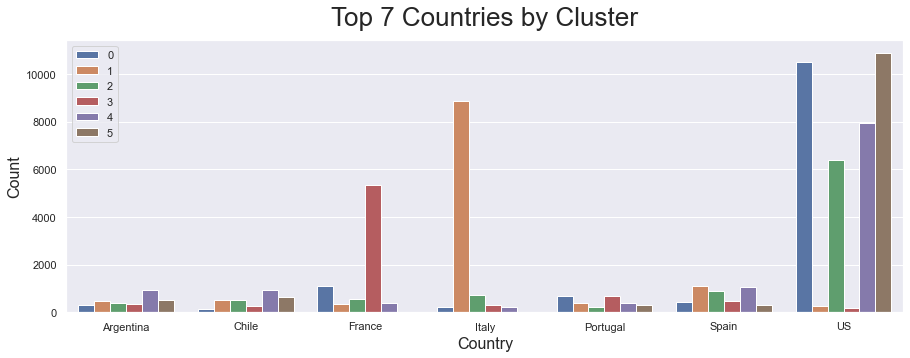

In [277]:
plot_clusters(df2, 'country',7,'Top 7 Countries by Cluster', 'Country', 
              ['Argentina','Chile','France','Italy','Portugal','Spain','US'],
              ['Argentina','Chile','France','Italy','Portugal','Spain','US'], 0, 2)

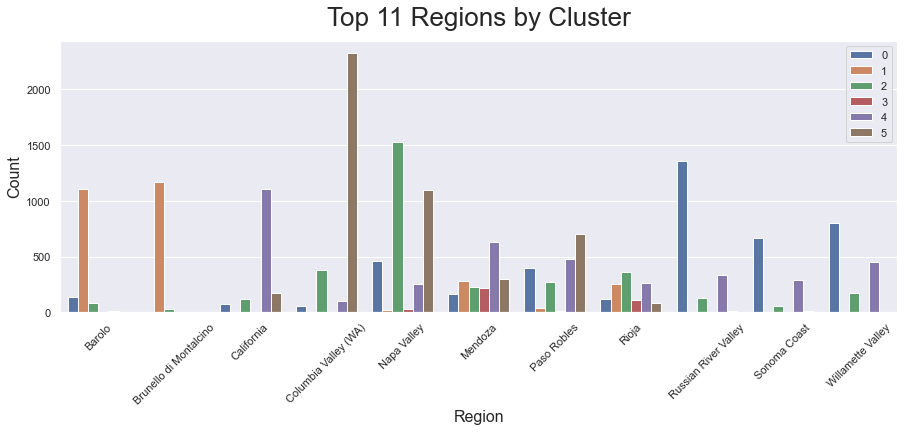

In [299]:
plot_clusters(df2,'region',11,'Top 11 Regions by Cluster', 'Region',
              ['Barolo','Brunello di Montalcino','California','Columbia Valley (WA)','Napa Valley','Mendoza','Paso Robles',
               'Rioja','Russian River Valley','Sonoma Coast','Willamette Valley'],
              ['Barolo','Brunello di Montalcino','California','Columbia Valley (WA)','Napa Valley','Mendoza','Paso Robles',
               'Rioja','Russian River Valley','Sonoma Coast','Willamette Valley'], 45, 1)

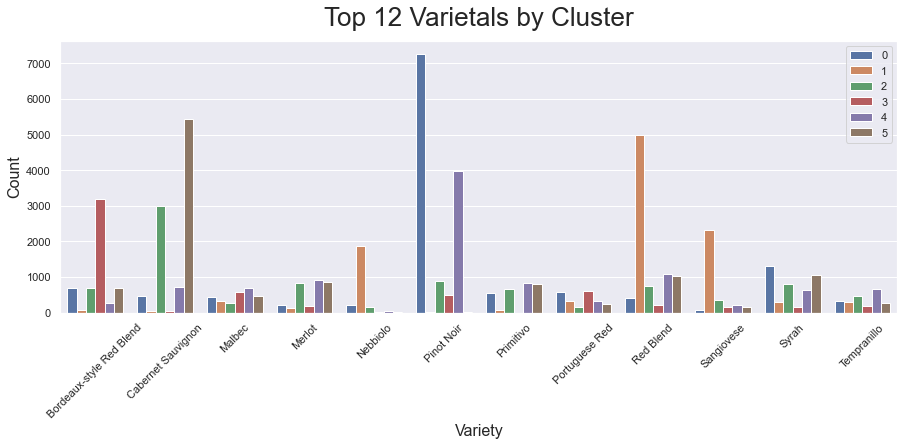

In [280]:
plot_clusters(df2,'variety',12,'Top 12 Varietals by Cluster', 'Variety',
              ['Bordeaux-style Red Blend','Cabernet Sauvignon','Malbec','Merlot','Nebbiolo','Pinot Noir','Primitivo',
               'Portuguese Red','Red Blend','Sangiovese','Syrah','Tempranillo'],
              ['Bordeaux-style Red Blend','Cabernet Sauvignon','Malbec','Merlot','Nebbiolo','Pinot Noir','Primitivo',
               'Portuguese Red','Red Blend','Sangiovese','Syrah','Tempranillo'],45, 0)


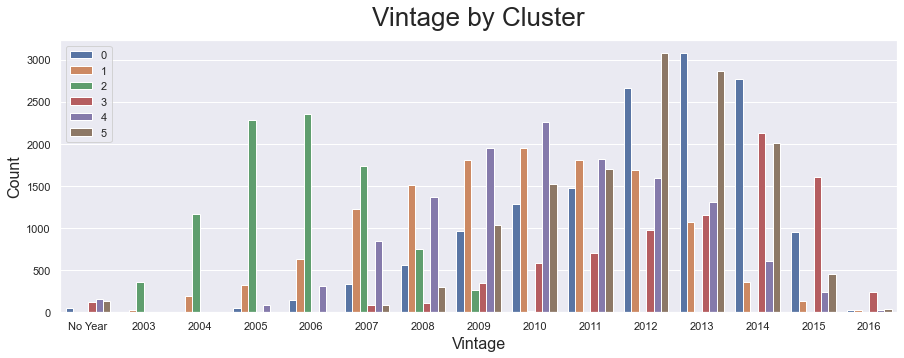

In [283]:
plot_clusters(df2, 'vintage',15,'Vintage by Cluster', 'Vintage', [0,14,13,12,11,10,9,8,7,6,5,4,3,2,1],
              ['No Year','2003','2004', '2005', '2006', '2007', '2008','2009','2010','2011','2012','2013','2014','2015','2016'],0,2)

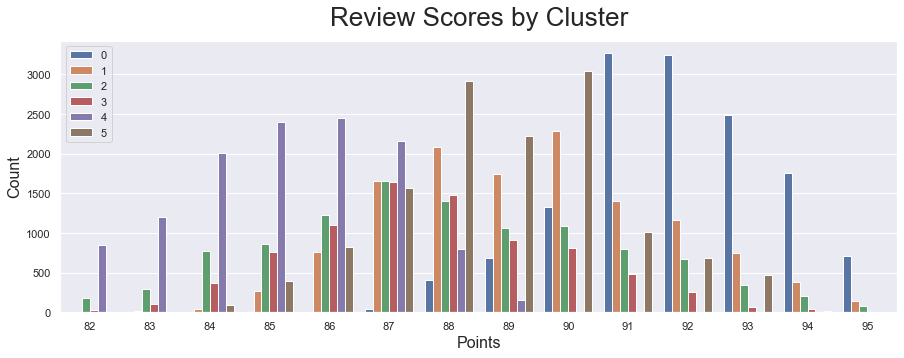

In [284]:
plot_clusters(df2, 'points',14,'Review Scores by Cluster', 'Points', [82,83,84,85,86,87,88,89,90,91,92,93,94,95],
              ['82','83','84','85', '86', '87', '88', '89','90','91','92','93','94','95'],0,2)

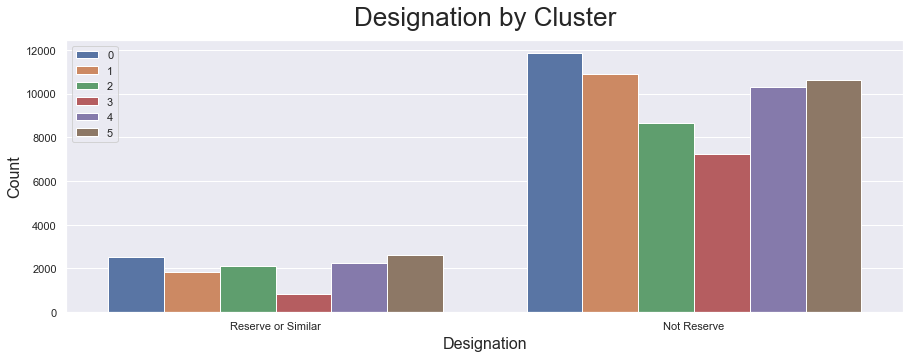

In [285]:
plot_clusters(df2, 'high_q_term',2,'Designation by Cluster', 'Designation', [1,0],
              ['Reserve or Similar','Not Reserve'],0,0)

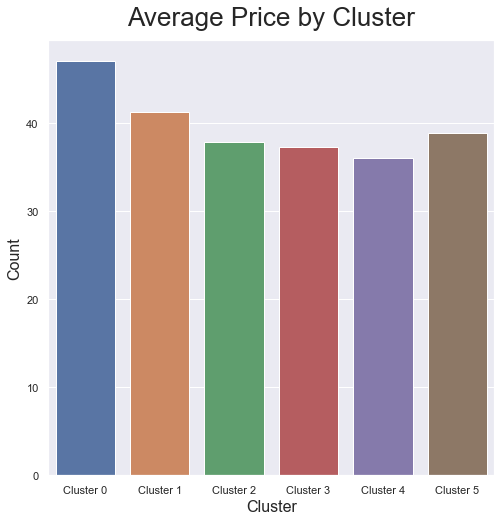

In [290]:
cluster_prices = df2.groupby('cluster_predicted')['price'].mean()
cluster_price_means = [cluster_prices[num] for num in range(0,6)]
x_numbers = [num ]

plt.figure(figsize=(8,8))
ax = plt.gca()

sns.barplot(x= [number for number in range(0,6)], y=cluster_price_means, palette = 'deep')

plt.xticks(np.arange(0, 1))
plt.xticks(np.arange(6), ['Cluster 0', 'Cluster 1','Cluster 2','Cluster 3','Cluster 4','Cluster 5'], rotation=0)

ax.set_title('Average Price by Cluster',fontsize=26,pad=15)
ax.set_ylabel('Count', fontsize=16)
ax.set_xlabel('Cluster', fontsize=16)

fig.tight_layout();


In [ ]:
df2['ratings']

**Clusters**
1. Cluster 0 - High-Rated American Pinot Noir
    - Highest on average price by far (\\$47.07)
    - Mostly American wines and regions (but not many from Napa)
    - Mostly Pinot Noir
    - Vintage similar to entire dataset
    - Highest rated cluster with peak at 91/92
1. Cluster 1 - Italian Wines
    - #2 on average price (\\$41.26)
    - Mostly Italian wines, regions and varietals
    - Somewhat older vintages peaking in 2010
    - Ratings similar to entire dataset, peaking at 88/90
1. Cluster 2 - Lower-Rated Napa Cabernets
    - #4 on average price (\\$37.94)
    - Mostly American wines
    - Mostly from Napa Valley
    - Mostly Cabernet Sauvignon
    - Oldest group of wines, peaking in 2005
    - Slightly lower ratings curve with peak at 87
    - Above average mix of reserve wines
1. Cluster 3 - French Wine
    - #5 on average price (\\$37.34)
    - Mostly French wines, regions and varietals
    - Youngest wines, with a peak in 2014
    - Slightly lower ratings curve with peak at 87
    - Below average mix of reserve wines
1. Cluster 4 - Value Pinot Noir
    - Lowest average price (\\$36.03)
    - Mostly American wine
    - Lots from California, the catch-all region that does not include the well-known CA regions
    - Mostly Pinot Noir
    - Somewhat older wines with peak of 2010
    - Lowest rating curve with peak at 85/86
1. Cluster 5 - High-Rated Cabernet
    - #3 on average price (\\$38.95)
    - Mostly American wines
    - Lots from both Napa Valley and Columbia Valley (WA)
    - Mostly Cabernet Sauvignon
    - Younger wines, peaking in 2012/2013
    - Above average review scores, peaking at 88/90
    - Above average mix of reserve wines

**Cluster Interpretation**

- With American wines being half of the dataset, it is not surprising that the two countries that are most dominant after that both were given their own clusters.
- Variety seems to be the first feature used for splitting the American wines, with Pinot Noir the main wine in clusters 1 & 4 and Cabernet Sauvignon the main wine in clusters 2 and 5.
- To make these last splits, the KPrototypes seems to have relied on review score.


- [Table of Contents](#Table-Of-Contents)
- [KPrototypes Notebook](kprototyes.ipynb)